# library

In [1]:
# Install compatible versions of dependencies
!pip uninstall -y torch torchvision torchaudio transformers
!pip install torch==2.0.1 torchvision==0.15.2 transformers==4.38.2

# Verify installations
import torch
import torchvision
import transformers
print(f"PyTorch version: {torch.__version__}")
print(f"Torchvision version: {torchvision.__version__}")
print(f"Transformers version: {transformers.__version__}")

Found existing installation: torch 2.5.1+cu121
Uninstalling torch-2.5.1+cu121:
  Successfully uninstalled torch-2.5.1+cu121
Found existing installation: torchvision 0.20.1+cu121
Uninstalling torchvision-0.20.1+cu121:
  Successfully uninstalled torchvision-0.20.1+cu121
Found existing installation: torchaudio 2.5.1+cu121
Uninstalling torchaudio-2.5.1+cu121:
  Successfully uninstalled torchaudio-2.5.1+cu121
Found existing installation: transformers 4.47.0
Uninstalling transformers-4.47.0:
  Successfully uninstalled transformers-4.47.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.7/130.7 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 104.1 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 112.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 2.4 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━

# library# 

In [5]:
from collections import Counter
from wordcloud import WordCloud

# library# 

In [2]:
import os
os.environ["TORCH_DYNAMO_DISABLE"] = "1"
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support
import xgboost as xgb
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import re
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from transformers import (
    DistilBertTokenizerFast, DistilBertForSequenceClassification,
    RobertaTokenizerFast, RobertaForSequenceClassification,
    BertTokenizerFast, BertForSequenceClassification,
    T5TokenizerFast, T5ForConditionalGeneration,
    AdamW
)

# Set device for computation
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


# dataset

**run hoise0dint cut**

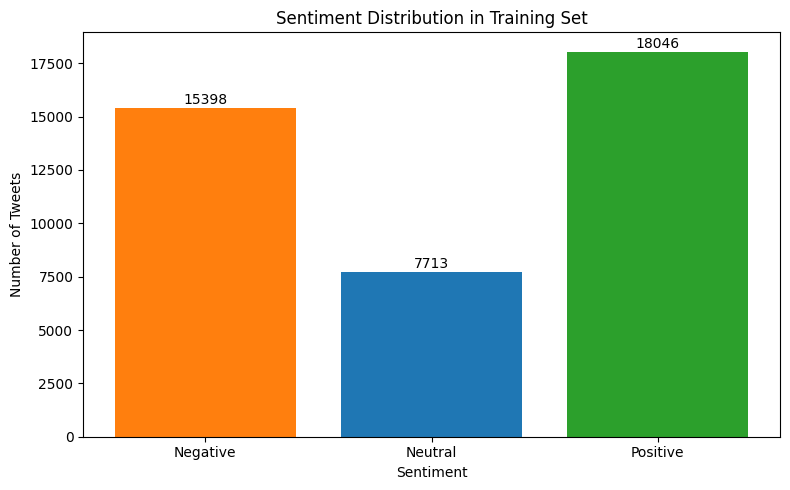


Sentiment Class Distribution (Training Set):
Sentiment
Negative    15398
Neutral      7713
Positive    18046
Name: count, dtype: int64

Sentiment Class Percentage:
Sentiment
Negative    37.41%
Neutral     18.74%
Positive    43.85%
Name: count, dtype: object


In [3]:
'''''
# Load dataset for initial analysis
train_df = pd.read_csv("/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_train.csv", encoding='latin-1')

# Map sentiments to 3 classes
sentiment_mapping_3class = {
    "Extremely Negative": "Negative",
    "Negative": "Negative",
    "Neutral": "Neutral",
    "Positive": "Positive",
    "Extremely Positive": "Positive"
}
train_df["Sentiment"] = train_df["Sentiment"].map(sentiment_mapping_3class)

# Calculate sentiment distribution
class_counts = train_df["Sentiment"].value_counts().reindex(['Negative', 'Neutral', 'Positive'], fill_value=0)

# Plot bar chart for sentiment distribution
plt.figure(figsize=(8, 5))
bars = plt.bar(class_counts.index, class_counts.values, color=['#ff7f0e', '#1f77b4', '#2ca02c'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.title('Sentiment Distribution in Training Set')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, f'{yval}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

# Print sentiment distribution
print("\nSentiment Class Distribution (Training Set):")
print(class_counts)
print("\nSentiment Class Percentage:")
print((class_counts / len(train_df) * 100).round(2).astype(str) + '%')

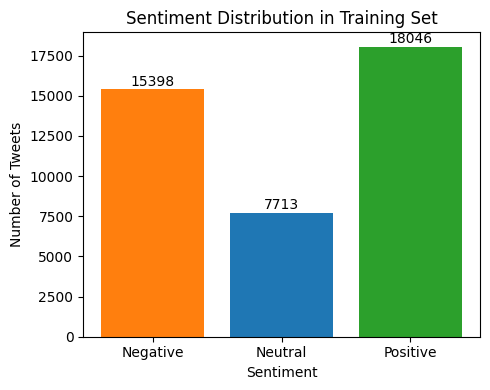

Sentiment,Count,Percentage
Negative,15398,37.41%
Neutral,7713,18.74%
Positive,18046,43.85%


In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# Load dataset
train_df = pd.read_csv("/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_train.csv", encoding='latin-1')

# Map sentiments to 3 classes
sentiment_mapping_3class = {
    "Extremely Negative": "Negative",
    "Negative": "Negative",
    "Neutral": "Neutral",
    "Positive": "Positive",
    "Extremely Positive": "Positive"
}
train_df["Sentiment"] = train_df["Sentiment"].map(sentiment_mapping_3class)

# Calculate sentiment distribution
class_counts = train_df["Sentiment"].value_counts().reindex(['Negative', 'Neutral', 'Positive'], fill_value=0)
class_percentages = (class_counts / len(train_df) * 100).round(2)

# Plot bar chart
plt.figure(figsize=(5, 4))
bars = plt.bar(class_counts.index, class_counts.values, color=['#ff7f0e', '#1f77b4', '#2ca02c'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.title('Sentiment Distribution in Training Set')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, f'{yval}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

# Create sentiment distribution DataFrame
distribution_df = pd.DataFrame({
    "Sentiment": class_counts.index,
    "Count": class_counts.values,
    "Percentage": class_percentages.astype(str) + '%'
})

# Display table with borders using HTML
html_table = distribution_df.to_html(index=False, border=1)
display(HTML(html_table))


# word cloud

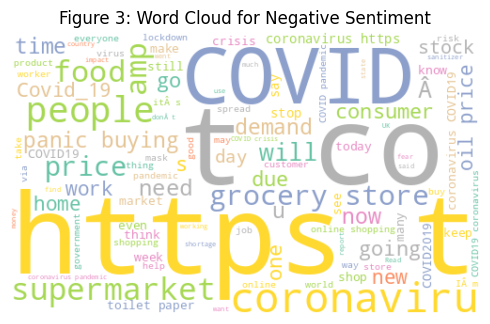

Word cloud for Negative displayed inline


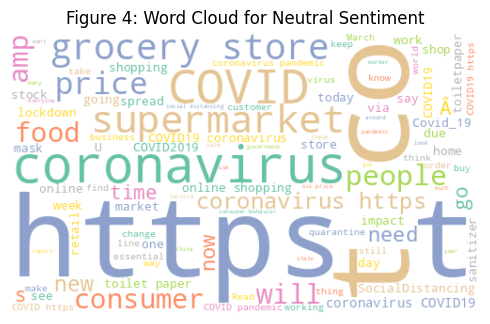

Word cloud for Neutral displayed inline


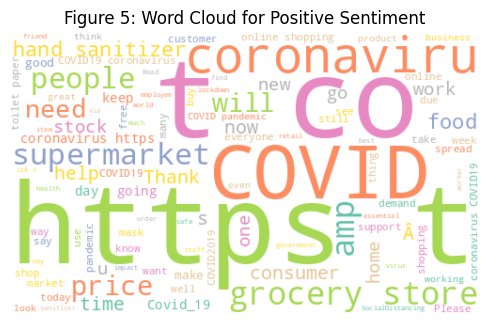

Word cloud for Positive displayed inline


In [6]:
# Generate and display word clouds for each sentiment class
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=500, height=300, background_color='white', 
                         max_words=100, colormap='Set2').generate(text)
    plt.figure(figsize=(5, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.tight_layout()
    plt.show()

for sentiment, fig_num in zip(['Negative', 'Neutral', 'Positive'], [3, 4, 5]):
    sentiment_text = ' '.join(train_df[train_df['Sentiment'] == sentiment]['OriginalTweet'])
    generate_wordcloud(sentiment_text, f"Figure {fig_num}: Word Cloud for {sentiment} Sentiment")
    print(f"Word cloud for {sentiment} displayed inline")

# dataset

**run hosise-dont cut**

In [7]:
'''''
# Load datasets
test_df = pd.read_csv("/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_test.csv", encoding='latin-1')

# Map sentiments to 3 classes for test set
test_df["Sentiment"] = test_df["Sentiment"].map(sentiment_mapping_3class)

# Display data shapes and sample
print("Train Data Shape:", train_df.shape)
print("Test Data Shape:", test_df.shape)
print("\nSample Training Data:")
print(train_df.head())

# Text cleaning function
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)  # Remove URLs
    text = re.sub(r"@\w+", "", text)  # Remove mentions
    text = re.sub(r"#\w+", "", text)  # Remove hashtags
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)  # Remove special characters
    text = re.sub(r"\s+", " ", text).strip()  # Normalize spaces
    return text

train_df["clean_text"] = train_df["OriginalTweet"].apply(clean_text)
test_df["clean_text"] = test_df["OriginalTweet"].apply(clean_text)

# Map labels to integers
sentiment_mapping = {"Negative": 0, "Neutral": 1, "Positive": 2}
train_df["label"] = train_df["Sentiment"].map(sentiment_mapping)
test_df["label"] = test_df["Sentiment"].map(sentiment_mapping)

# Display sample cleaned data
print("\nSample Cleaned and Labeled Data:")
print(train_df[["clean_text", "Sentiment", "label"]].head())

# Split data
X = train_df["clean_text"]
y = train_df["label"]
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")

Train Data Shape: (41157, 6)
Test Data Shape: (3798, 6)

Sample Training Data:
   UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                       OriginalTweet Sentiment  
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...   Neutral  
1  advice Talk to your neighbours family to excha...  Positive  
2  Coronavirus Australia: Woolworths to give elde...  Positive  
3  My food stock is not the only one which is emp...  Positive  
4  Me, ready to go at supermarket during the #COV...  Negative  

Sample Cleaned and Labeled Data:
                                          clean_text Sentiment  label
0                                            and and   Neutral      1
1  advice talk to your neighbours family to excha...  Po

In [56]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from IPython.display import display, HTML

# Load training dataset
train_df = pd.read_csv("/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_train.csv", encoding='latin-1')


train_df["Sentiment"] = train_df["Sentiment"].map(sentiment_mapping_3class)


# Table: Sentiment Distribution
display(HTML("<h3>Sentiment Distribution (Count & Percentage)</h3>"))
sentiment_table = pd.DataFrame({
    "Sentiment": class_counts.index,
    "Count": class_counts.values,
    "Percentage": class_percentages.astype(str) + '%'
})
display(HTML(sentiment_table.to_html(index=False, border=1)))

# Load test dataset
test_df = pd.read_csv("/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_test.csv", encoding='latin-1')

# Map test sentiments to 3 classes
test_df["Sentiment"] = test_df["Sentiment"].map(sentiment_mapping_3class)

# Table: Dataset Shapes
display(HTML("<h3>Dataset Shapes (Train & Test)</h3>"))
shape_df = pd.DataFrame({
    "Dataset": ["Train", "Test"],
    "Rows": [train_df.shape[0], test_df.shape[0]],
    "Columns": [train_df.shape[1], test_df.shape[1]]
})
display(HTML(shape_df.to_html(index=False, border=1)))

# Table: Sample Training Data
display(HTML("<h3>Sample Training Data (Raw)</h3>"))
display(HTML(train_df.head().to_html(index=False, border=1)))

# Text cleaning function
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)  # Remove URLs
    text = re.sub(r"@\w+", "", text)            # Remove mentions
    text = re.sub(r"#\w+", "", text)            # Remove hashtags
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)  # Remove special characters
    text = re.sub(r"\s+", " ", text).strip()    # Normalize spaces
    return text

# Apply text cleaning
train_df["clean_text"] = train_df["OriginalTweet"].apply(clean_text)
test_df["clean_text"] = test_df["OriginalTweet"].apply(clean_text)

# Map sentiment labels to integers
sentiment_mapping = {"Negative": 0, "Neutral": 1, "Positive": 2}
train_df["label"] = train_df["Sentiment"].map(sentiment_mapping)
test_df["label"] = test_df["Sentiment"].map(sentiment_mapping)

# Table: Sample Cleaned and Labeled Data
display(HTML("<h3>Sample Cleaned & Labeled Training Data</h3>"))
display(HTML(train_df[["clean_text", "Sentiment", "label"]].head().to_html(index=False, border=1)))

# Split training data into train and validation sets
X = train_df["clean_text"]
y = train_df["label"]
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Table: Train/Validation Split Sizes
display(HTML("<h3>Training vs Validation Set Sizes</h3>"))
split_sizes_df = pd.DataFrame({
    "Set": ["Training", "Validation"],
    "Size": [len(X_train), len(X_val)]
})
display(HTML(split_sizes_df.to_html(index=False, border=1)))


Sentiment,Count,Percentage
Negative,15398,37.41%
Neutral,7713,18.74%
Positive,18046,43.85%


Dataset,Rows,Columns
Train,41157,6
Test,3798,6


UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral
3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive
3801,48753,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive
3802,48754,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive
3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Negative


clean_text,Sentiment,label
and and,Neutral,1
advice talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist gp set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive,2
coronavirus australia woolworths to give elderly disabled dedicated shopping hours amid covid19 outbreak,Positive,2
my food stock is not the only one which is empty please dont panic there will be enough food for everyone if you do not take more than you need stay calm stay safe,Positive,2
me ready to go at supermarket during the outbreak not because im paranoid but because my food stock is litteraly empty the is a serious thing but please dont panic it causes shortage,Negative,0


Set,Size
Training,32925
Validation,8232


# ML


Logistic Regression - Validation Accuracy: 0.7763605442176871
Logistic Regression - Validation Classification Report:
              precision    recall  f1-score   support

    Negative       0.82      0.76      0.79      3080
     Neutral       0.60      0.82      0.69      1543
    Positive       0.86      0.77      0.81      3609

    accuracy                           0.78      8232
   macro avg       0.76      0.78      0.76      8232
weighted avg       0.79      0.78      0.78      8232


Logistic Regression - Validation Confusion Matrix:
[[2340  416  324]
 [ 146 1264  133]
 [ 385  437 2787]]


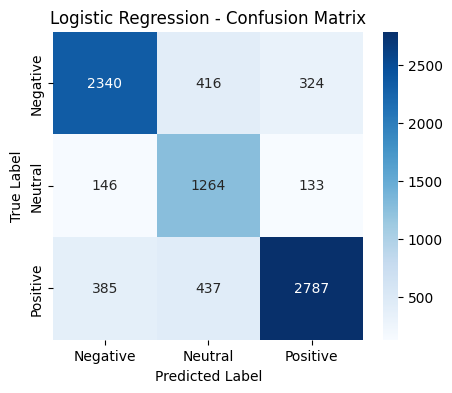


XGBoost - Validation Accuracy: 0.7568027210884354
XGBoost - Validation Classification Report:
              precision    recall  f1-score   support

    Negative       0.79      0.73      0.76      3080
     Neutral       0.64      0.74      0.69      1543
    Positive       0.79      0.79      0.79      3609

    accuracy                           0.76      8232
   macro avg       0.74      0.75      0.74      8232
weighted avg       0.76      0.76      0.76      8232


XGBoost - Validation Confusion Matrix:
[[2252  301  527]
 [ 176 1143  224]
 [ 427  347 2835]]


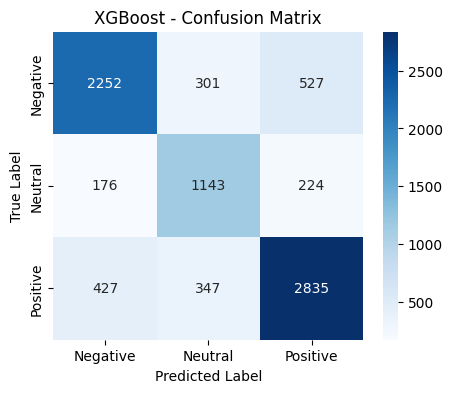


SVM - Validation Accuracy: 0.7885082604470359
SVM - Validation Classification Report:
              precision    recall  f1-score   support

    Negative       0.82      0.77      0.79      3080
     Neutral       0.63      0.83      0.72      1543
    Positive       0.87      0.78      0.82      3609

    accuracy                           0.79      8232
   macro avg       0.77      0.80      0.78      8232
weighted avg       0.80      0.79      0.79      8232


SVM - Validation Confusion Matrix:
[[2382  379  319]
 [ 139 1288  116]
 [ 396  392 2821]]


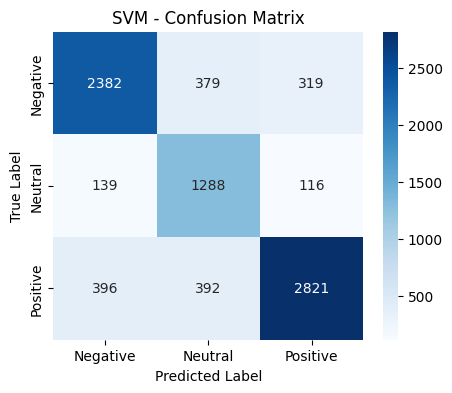


Random Forest - Validation Accuracy: 0.7368804664723032
Random Forest - Validation Classification Report:
              precision    recall  f1-score   support

    Negative       0.74      0.72      0.73      3080
     Neutral       0.65      0.69      0.67      1543
    Positive       0.78      0.77      0.78      3609

    accuracy                           0.74      8232
   macro avg       0.72      0.73      0.72      8232
weighted avg       0.74      0.74      0.74      8232


Random Forest - Validation Confusion Matrix:
[[2214  290  576]
 [ 260 1062  221]
 [ 528  291 2790]]


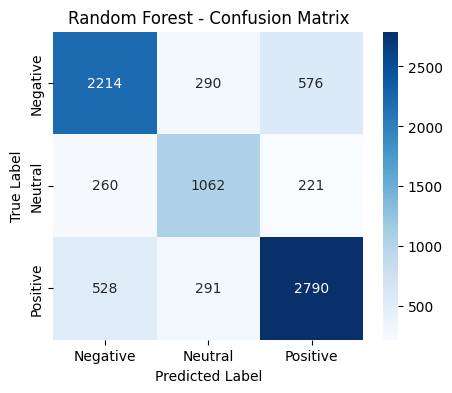

In [8]:
# Define function to print confusion matrix
def print_confusion_matrix(y_true, y_pred, model_name, set_name="Validation"):
    cm = confusion_matrix(y_true, y_pred)
    print(f"\n{model_name} - {set_name} Confusion Matrix:")
    print(cm)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], 
                yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()

# TF-IDF Vectorization (Bigram only)
tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2), stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)
X_test_tfidf = tfidf_vectorizer.transform(test_df["clean_text"])

# Logistic Regression
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
log_reg.fit(X_train_tfidf, y_train)
val_preds_logreg = log_reg.predict(X_val_tfidf)
print("\nLogistic Regression - Validation Accuracy:", accuracy_score(y_val, val_preds_logreg))
print("Logistic Regression - Validation Classification Report:")
print(classification_report(y_val, val_preds_logreg, target_names=['Negative', 'Neutral', 'Positive']))
print_confusion_matrix(y_val, val_preds_logreg, "Logistic Regression")

# XGBoost
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax', num_class=3, eval_metric='mlogloss', use_label_encoder=False, random_state=42
)
xgb_model.fit(X_train_tfidf, y_train)
val_preds_xgb = xgb_model.predict(X_val_tfidf)
print("\nXGBoost - Validation Accuracy:", accuracy_score(y_val, val_preds_xgb))
print("XGBoost - Validation Classification Report:")
print(classification_report(y_val, val_preds_xgb, target_names=['Negative', 'Neutral', 'Positive']))
print_confusion_matrix(y_val, val_preds_xgb, "XGBoost")

# SVM
svm_model = SVC(kernel='linear', class_weight='balanced', random_state=42)
svm_model.fit(X_train_tfidf, y_train)
val_preds_svm = svm_model.predict(X_val_tfidf)
print("\nSVM - Validation Accuracy:", accuracy_score(y_val, val_preds_svm))
print("SVM - Validation Classification Report:")
print(classification_report(y_val, val_preds_svm, target_names=['Negative', 'Neutral', 'Positive']))
print_confusion_matrix(y_val, val_preds_svm, "SVM")

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train_tfidf, y_train)
val_preds_rf = rf_model.predict(X_val_tfidf)
print("\nRandom Forest - Validation Accuracy:", accuracy_score(y_val, val_preds_rf))
print("Random Forest - Validation Classification Report:")
print(classification_report(y_val, val_preds_rf, target_names=['Negative', 'Neutral', 'Positive']))
print_confusion_matrix(y_val, val_preds_rf, "Random Forest")

# DL

In [9]:
# Initialize transformer models
distilbert_tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')
distilbert_model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=3)
distilbert_model.to(device)
print("DistilBERT model loaded and moved to device:", device)

roberta_tokenizer = RobertaTokenizerFast.from_pretrained('roberta-base')
roberta_model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=3)
roberta_model.to(device)
print("RoBERTa model loaded and moved to device:", device)

bert_tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')
bert_model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)
bert_model.to(device)
print("BERT model loaded and moved to device:", device)

t5_tokenizer = T5TokenizerFast.from_pretrained('t5-small')
t5_model = T5ForConditionalGeneration.from_pretrained('t5-small')

# Custom T5 classification head
class T5ForClassification(nn.Module):
    def __init__(self, t5_model, num_labels):
        super(T5ForClassification, self).__init__()
        self.t5 = t5_model
        self.dense = nn.Linear(t5_model.config.d_model, num_labels)
    
    def forward(self, input_ids, attention_mask, labels=None):
        outputs = self.t5.encoder(input_ids=input_ids, attention_mask=attention_mask)
        hidden_state = outputs.last_hidden_state[:, 0, :]
        logits = self.dense(hidden_state)
        loss = None
        if labels is not None:
            loss_fn = nn.CrossEntropyLoss()
            loss = loss_fn(logits, labels)
        return type('Output', (), {'loss': loss, 'logits': logits})()

t5_classifier = T5ForClassification(t5_model, num_labels=3)
t5_classifier.to(device)
print("T5 model loaded and moved to device:", device)

# Dataset for transformer models
class TweetDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=max_len, return_tensors='pt')
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Create datasets
MAX_LEN = 128
distilbert_train_dataset = TweetDataset(X_train.tolist(), y_train.tolist(), distilbert_tokenizer, MAX_LEN)
distilbert_val_dataset = TweetDataset(X_val.tolist(), y_val.tolist(), distilbert_tokenizer, MAX_LEN)
distilbert_test_dataset = TweetDataset(test_df["clean_text"].tolist(), test_df["label"].tolist(), distilbert_tokenizer, MAX_LEN)

roberta_train_dataset = TweetDataset(X_train.tolist(), y_train.tolist(), roberta_tokenizer, MAX_LEN)
roberta_val_dataset = TweetDataset(X_val.tolist(), y_val.tolist(), roberta_tokenizer, MAX_LEN)
roberta_test_dataset = TweetDataset(test_df["clean_text"].tolist(), test_df["label"].tolist(), roberta_tokenizer, MAX_LEN)

bert_train_dataset = TweetDataset(X_train.tolist(), y_train.tolist(), bert_tokenizer, MAX_LEN)
bert_val_dataset = TweetDataset(X_val.tolist(), y_val.tolist(), bert_tokenizer, MAX_LEN)
bert_test_dataset = TweetDataset(test_df["clean_text"].tolist(), test_df["label"].tolist(), bert_tokenizer, MAX_LEN)

t5_train_dataset = TweetDataset(X_train.tolist(), y_train.tolist(), t5_tokenizer, MAX_LEN)
t5_val_dataset = TweetDataset(X_val.tolist(), y_val.tolist(), t5_tokenizer, MAX_LEN)
t5_test_dataset = TweetDataset(test_df["clean_text"].tolist(), test_df["label"].tolist(), t5_tokenizer, MAX_LEN)

# Create data loaders
distilbert_train_loader = DataLoader(distilbert_train_dataset, batch_size=32, shuffle=True)
distilbert_val_loader = DataLoader(distilbert_val_dataset, batch_size=32)
distilbert_test_loader = DataLoader(distilbert_test_dataset, batch_size=32, shuffle=False)

roberta_train_loader = DataLoader(roberta_train_dataset, batch_size=32, shuffle=True)
roberta_val_loader = DataLoader(roberta_val_dataset, batch_size=32)
roberta_test_loader = DataLoader(roberta_test_dataset, batch_size=32, shuffle=False)

bert_train_loader = DataLoader(bert_train_dataset, batch_size=32, shuffle=True)
bert_val_loader = DataLoader(bert_val_dataset, batch_size=32)
bert_test_loader = DataLoader(bert_test_dataset, batch_size=32, shuffle=False)

t5_train_loader = DataLoader(t5_train_dataset, batch_size=32, shuffle=True)
t5_val_loader = DataLoader(t5_val_dataset, batch_size=32)
t5_test_loader = DataLoader(t5_test_dataset, batch_size=32, shuffle=False)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


DistilBERT model loaded and moved to device: cuda


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


RoBERTa model loaded and moved to device: cuda


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERT model loaded and moved to device: cuda


tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

T5 model loaded and moved to device: cuda


# glove

In [10]:
# Load GloVe embeddings
def load_glove_embeddings(file_path, word_index, embedding_dim=50):
    embeddings_index = {}
    with open(file_path, encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
    return embedding_matrix

all_words = ' '.join(X_train).split()
word_counts = Counter(all_words)
vocab = {word: idx + 1 for idx, (word, _) in enumerate(word_counts.most_common(10000))}
embedding_dim = 50
embedding_matrix = load_glove_embeddings('/kaggle/input/glove6b50dtxt/glove.6B.50d.txt', vocab, embedding_dim)

# Dataset for CNN/BiLSTM
class TextDataset(Dataset):
    def __init__(self, texts, labels, vocab, max_len):
        self.texts = texts
        self.labels = labels
        self.vocab = vocab
        self.max_len = max_len

    def __getitem__(self, idx):
        text = self.texts[idx].split()
        token_ids = [self.vocab.get(word, 0) for word in text[:self.max_len]]
        if len(token_ids) < self.max_len:
            token_ids += [0] * (self.max_len - len(token_ids))
        return {
            'input_ids': torch.tensor(token_ids, dtype=torch.long),
            'labels': torch.tensor(self.labels[idx], dtype=torch.long)
        }

    def __len__(self):
        return len(self.texts)

# Define CNN model
class CNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, embedding_matrix, num_filters, filter_sizes, dropout, num_classes):
        super(CNN, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.embedding.weight = nn.Parameter(torch.tensor(embedding_matrix, dtype=torch.float32))
        self.embedding.weight.requires_grad = False
        self.convs = nn.ModuleList([nn.Conv1d(embedding_dim, num_filters, fs) for fs in filter_sizes])
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(num_filters * len(filter_sizes), num_classes)

    def forward(self, input_ids, labels=None):
        x = self.embedding(input_ids).transpose(1, 2)
        x = [torch.relu(conv(x)) for conv in self.convs]
        x = [torch.max_pool1d(conv_out, conv_out.size(2)).squeeze(2) for conv_out in x]
        x = torch.cat(x, 1)
        x = self.dropout(x)
        logits = self.fc(x)
        loss = None
        if labels is not None:
            loss_fn = nn.CrossEntropyLoss()
            loss = loss_fn(logits, labels)
        return type('Output', (), {'loss': loss, 'logits': logits})()

# Define BiLSTM model
class BiLSTM(nn.Module):
    def __init__(self, vocab_size, embedding_dim, embedding_matrix, hidden_dim, num_layers, dropout, num_classes):
        super(BiLSTM, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.embedding.weight = nn.Parameter(torch.tensor(embedding_matrix, dtype=torch.float32))
        self.embedding.weight.requires_grad = False
        self.bilstm = nn.LSTM(embedding_dim, hidden_dim, num_layers, batch_first=True, dropout=dropout, bidirectional=True)
        self.fc = nn.Linear(hidden_dim * 2, num_classes)
        self.dropout = nn.Dropout(dropout)

    def forward(self, input_ids, labels=None):
        x = self.embedding(input_ids)
        _, (hidden, _) = self.bilstm(x)
        x = torch.cat((hidden[-2], hidden[-1]), dim=1)
        x = self.dropout(x)
        logits = self.fc(x)
        loss = None
        if labels is not None:
            loss_fn = nn.CrossEntropyLoss()
            loss = loss_fn(logits, labels)
        return type('Output', (), {'loss': loss, 'logits': logits})()

# Initialize CNN and BiLSTM models
vocab_size = len(vocab) + 1
cnn_model = CNN(vocab_size, embedding_dim, embedding_matrix, num_filters=100, filter_sizes=[3, 4, 5], dropout=0.5, num_classes=3)
cnn_model.to(device)
bilstm_model = BiLSTM(vocab_size, embedding_dim, embedding_matrix, hidden_dim=128, num_layers=2, dropout=0.5, num_classes=3)
bilstm_model.to(device)

# Create datasets
text_train_dataset = TextDataset(X_train.tolist(), y_train.tolist(), vocab, MAX_LEN)
text_val_dataset = TextDataset(X_val.tolist(), y_val.tolist(), vocab, MAX_LEN)
text_test_dataset = TextDataset(test_df["clean_text"].tolist(), test_df["label"].tolist(), vocab, MAX_LEN)

# Create data loaders
text_train_loader = DataLoader(text_train_dataset, batch_size=32, shuffle=True)
text_val_loader = DataLoader(text_val_dataset, batch_size=32)
text_test_loader = DataLoader(text_test_dataset, batch_size=32, shuffle=False)

# DL train

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(



DistilBERT - Epoch 1/10


100%|██████████| 1029/1029 [02:32<00:00,  6.75it/s]


DistilBERT - Average training loss: 0.5043, Training Accuracy: 0.8034
DistilBERT - Validation Accuracy: 0.8879

DistilBERT - Epoch 2/10


100%|██████████| 1029/1029 [02:32<00:00,  6.75it/s]


DistilBERT - Average training loss: 0.2589, Training Accuracy: 0.9140
DistilBERT - Validation Accuracy: 0.9060

DistilBERT - Epoch 3/10


100%|██████████| 1029/1029 [02:32<00:00,  6.74it/s]


DistilBERT - Average training loss: 0.1711, Training Accuracy: 0.9438
DistilBERT - Validation Accuracy: 0.9167

DistilBERT - Epoch 4/10


100%|██████████| 1029/1029 [02:32<00:00,  6.75it/s]


DistilBERT - Average training loss: 0.1168, Training Accuracy: 0.9612
DistilBERT - Validation Accuracy: 0.9131

DistilBERT - Epoch 5/10


100%|██████████| 1029/1029 [02:32<00:00,  6.75it/s]


DistilBERT - Average training loss: 0.0888, Training Accuracy: 0.9701
DistilBERT - Validation Accuracy: 0.9113

DistilBERT - Epoch 6/10


100%|██████████| 1029/1029 [02:32<00:00,  6.75it/s]


DistilBERT - Average training loss: 0.0711, Training Accuracy: 0.9764
DistilBERT - Validation Accuracy: 0.9182

DistilBERT - Epoch 7/10


100%|██████████| 1029/1029 [02:32<00:00,  6.74it/s]


DistilBERT - Average training loss: 0.0556, Training Accuracy: 0.9817
DistilBERT - Validation Accuracy: 0.9199

DistilBERT - Epoch 8/10


100%|██████████| 1029/1029 [02:32<00:00,  6.75it/s]


DistilBERT - Average training loss: 0.0468, Training Accuracy: 0.9844
DistilBERT - Validation Accuracy: 0.9164

DistilBERT - Epoch 9/10


100%|██████████| 1029/1029 [02:32<00:00,  6.75it/s]


DistilBERT - Average training loss: 0.0349, Training Accuracy: 0.9879
DistilBERT - Validation Accuracy: 0.9082

DistilBERT - Epoch 10/10


100%|██████████| 1029/1029 [02:32<00:00,  6.75it/s]


DistilBERT - Average training loss: 0.0274, Training Accuracy: 0.9910
DistilBERT - Validation Accuracy: 0.9121

DistilBERT - Validation Classification Report:
              precision    recall  f1-score   support

    Negative       0.89      0.94      0.92      3080
     Neutral       0.88      0.85      0.87      1543
    Positive       0.94      0.91      0.93      3609

    accuracy                           0.91      8232
   macro avg       0.90      0.90      0.90      8232
weighted avg       0.91      0.91      0.91      8232


DistilBERT - Validation Confusion Matrix:
[[2891   76  113]
 [ 140 1318   85]
 [ 200  110 3299]]


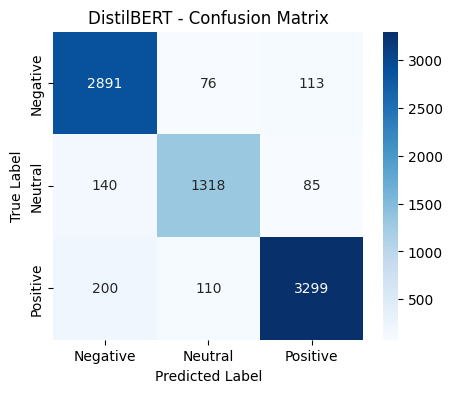

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(



RoBERTa - Epoch 1/10


100%|██████████| 1029/1029 [05:30<00:00,  3.12it/s]


RoBERTa - Average training loss: 0.5312, Training Accuracy: 0.7889
RoBERTa - Validation Accuracy: 0.8686

RoBERTa - Epoch 2/10


100%|██████████| 1029/1029 [05:30<00:00,  3.12it/s]


RoBERTa - Average training loss: 0.3086, Training Accuracy: 0.8964
RoBERTa - Validation Accuracy: 0.8981

RoBERTa - Epoch 3/10


100%|██████████| 1029/1029 [05:30<00:00,  3.12it/s]


RoBERTa - Average training loss: 0.2295, Training Accuracy: 0.9237
RoBERTa - Validation Accuracy: 0.9130

RoBERTa - Epoch 4/10


100%|██████████| 1029/1029 [05:29<00:00,  3.12it/s]


RoBERTa - Average training loss: 0.1765, Training Accuracy: 0.9415
RoBERTa - Validation Accuracy: 0.9164

RoBERTa - Epoch 5/10


100%|██████████| 1029/1029 [05:30<00:00,  3.11it/s]


RoBERTa - Average training loss: 0.1400, Training Accuracy: 0.9542
RoBERTa - Validation Accuracy: 0.9151

RoBERTa - Epoch 6/10


100%|██████████| 1029/1029 [05:30<00:00,  3.12it/s]


RoBERTa - Average training loss: 0.1138, Training Accuracy: 0.9613
RoBERTa - Validation Accuracy: 0.9114

RoBERTa - Epoch 7/10


100%|██████████| 1029/1029 [05:29<00:00,  3.12it/s]


RoBERTa - Average training loss: 0.0947, Training Accuracy: 0.9687
RoBERTa - Validation Accuracy: 0.9163

RoBERTa - Epoch 8/10


100%|██████████| 1029/1029 [05:30<00:00,  3.12it/s]


RoBERTa - Average training loss: 0.0798, Training Accuracy: 0.9732
RoBERTa - Validation Accuracy: 0.9152

RoBERTa - Epoch 9/10


100%|██████████| 1029/1029 [05:29<00:00,  3.12it/s]


RoBERTa - Average training loss: 0.0700, Training Accuracy: 0.9755
RoBERTa - Validation Accuracy: 0.9184

RoBERTa - Epoch 10/10


100%|██████████| 1029/1029 [05:29<00:00,  3.13it/s]


RoBERTa - Average training loss: 0.0602, Training Accuracy: 0.9792
RoBERTa - Validation Accuracy: 0.9190

RoBERTa - Validation Classification Report:
              precision    recall  f1-score   support

    Negative       0.92      0.93      0.92      3080
     Neutral       0.87      0.86      0.87      1543
    Positive       0.94      0.94      0.94      3609

    accuracy                           0.92      8232
   macro avg       0.91      0.91      0.91      8232
weighted avg       0.92      0.92      0.92      8232


RoBERTa - Validation Confusion Matrix:
[[2858   94  128]
 [ 118 1331   94]
 [ 132  101 3376]]


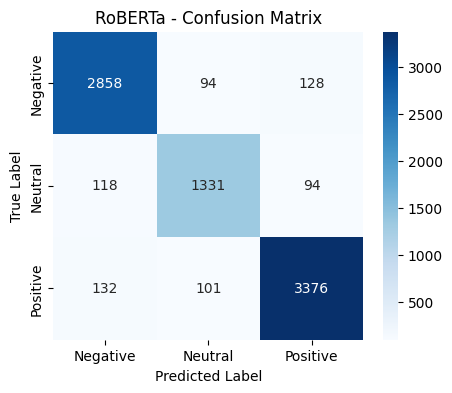

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(



BERT - Epoch 1/10


100%|██████████| 1029/1029 [04:59<00:00,  3.44it/s]


BERT - Average training loss: 0.4950, Training Accuracy: 0.8074
BERT - Validation Accuracy: 0.8967

BERT - Epoch 2/10


100%|██████████| 1029/1029 [04:59<00:00,  3.44it/s]


BERT - Average training loss: 0.2426, Training Accuracy: 0.9204
BERT - Validation Accuracy: 0.9116

BERT - Epoch 3/10


100%|██████████| 1029/1029 [04:59<00:00,  3.44it/s]


BERT - Average training loss: 0.1589, Training Accuracy: 0.9493
BERT - Validation Accuracy: 0.9057

BERT - Epoch 4/10


100%|██████████| 1029/1029 [04:58<00:00,  3.44it/s]


BERT - Average training loss: 0.1149, Training Accuracy: 0.9629
BERT - Validation Accuracy: 0.9243

BERT - Epoch 5/10


100%|██████████| 1029/1029 [04:58<00:00,  3.44it/s]


BERT - Average training loss: 0.0861, Training Accuracy: 0.9716
BERT - Validation Accuracy: 0.9174

BERT - Epoch 6/10


100%|██████████| 1029/1029 [05:00<00:00,  3.43it/s]


BERT - Average training loss: 0.0698, Training Accuracy: 0.9772
BERT - Validation Accuracy: 0.9264

BERT - Epoch 7/10


100%|██████████| 1029/1029 [04:59<00:00,  3.44it/s]


BERT - Average training loss: 0.0495, Training Accuracy: 0.9829
BERT - Validation Accuracy: 0.9172

BERT - Epoch 8/10


100%|██████████| 1029/1029 [04:59<00:00,  3.44it/s]


BERT - Average training loss: 0.0439, Training Accuracy: 0.9861
BERT - Validation Accuracy: 0.9193

BERT - Epoch 9/10


100%|██████████| 1029/1029 [04:59<00:00,  3.43it/s]


BERT - Average training loss: 0.0319, Training Accuracy: 0.9900
BERT - Validation Accuracy: 0.9208

BERT - Epoch 10/10


100%|██████████| 1029/1029 [05:00<00:00,  3.43it/s]


BERT - Average training loss: 0.0269, Training Accuracy: 0.9920
BERT - Validation Accuracy: 0.9201

BERT - Validation Classification Report:
              precision    recall  f1-score   support

    Negative       0.94      0.91      0.92      3080
     Neutral       0.89      0.87      0.88      1543
    Positive       0.92      0.95      0.93      3609

    accuracy                           0.92      8232
   macro avg       0.92      0.91      0.91      8232
weighted avg       0.92      0.92      0.92      8232


BERT - Validation Confusion Matrix:
[[2801   88  191]
 [  85 1335  123]
 [  98   73 3438]]


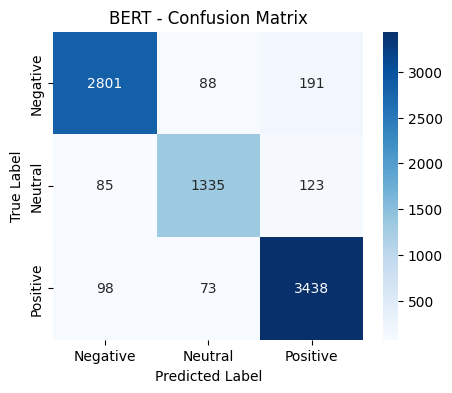

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(



T5 - Epoch 1/10


100%|██████████| 1029/1029 [01:44<00:00,  9.88it/s]


T5 - Average training loss: 1.0364, Training Accuracy: 0.4508
T5 - Validation Accuracy: 0.4925

T5 - Epoch 2/10


100%|██████████| 1029/1029 [01:44<00:00,  9.86it/s]


T5 - Average training loss: 0.9638, Training Accuracy: 0.5340
T5 - Validation Accuracy: 0.6319

T5 - Epoch 3/10


100%|██████████| 1029/1029 [01:44<00:00,  9.88it/s]


T5 - Average training loss: 0.7885, Training Accuracy: 0.6832
T5 - Validation Accuracy: 0.7400

T5 - Epoch 4/10


100%|██████████| 1029/1029 [01:44<00:00,  9.86it/s]


T5 - Average training loss: 0.6336, Training Accuracy: 0.7572
T5 - Validation Accuracy: 0.7733

T5 - Epoch 5/10


100%|██████████| 1029/1029 [01:44<00:00,  9.86it/s]


T5 - Average training loss: 0.5613, Training Accuracy: 0.7895
T5 - Validation Accuracy: 0.7956

T5 - Epoch 6/10


100%|██████████| 1029/1029 [01:44<00:00,  9.88it/s]


T5 - Average training loss: 0.5185, Training Accuracy: 0.8045
T5 - Validation Accuracy: 0.8155

T5 - Epoch 7/10


100%|██████████| 1029/1029 [01:44<00:00,  9.86it/s]


T5 - Average training loss: 0.4852, Training Accuracy: 0.8215
T5 - Validation Accuracy: 0.8257

T5 - Epoch 8/10


100%|██████████| 1029/1029 [01:44<00:00,  9.86it/s]


T5 - Average training loss: 0.4565, Training Accuracy: 0.8323
T5 - Validation Accuracy: 0.8316

T5 - Epoch 9/10


100%|██████████| 1029/1029 [01:44<00:00,  9.86it/s]


T5 - Average training loss: 0.4348, Training Accuracy: 0.8422
T5 - Validation Accuracy: 0.8404

T5 - Epoch 10/10


100%|██████████| 1029/1029 [01:44<00:00,  9.85it/s]


T5 - Average training loss: 0.4146, Training Accuracy: 0.8516
T5 - Validation Accuracy: 0.8482

T5 - Validation Classification Report:
              precision    recall  f1-score   support

    Negative       0.83      0.87      0.85      3080
     Neutral       0.86      0.73      0.79      1543
    Positive       0.86      0.88      0.87      3609

    accuracy                           0.85      8232
   macro avg       0.85      0.83      0.84      8232
weighted avg       0.85      0.85      0.85      8232


T5 - Validation Confusion Matrix:
[[2675   86  319]
 [ 196 1130  217]
 [ 340   92 3177]]


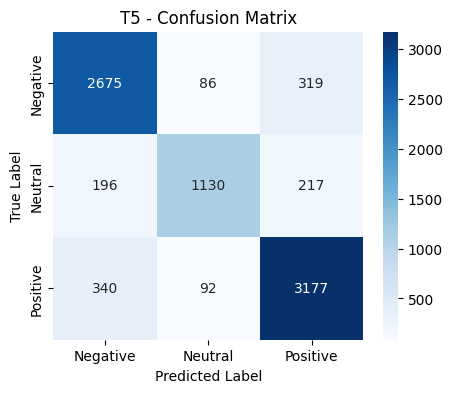

In [11]:
# Training parameters
epochs_transformer = 10

# Train and evaluate DistilBERT
distilbert_optimizer = AdamW(distilbert_model.parameters(), lr=2e-5, weight_decay=0.03)
for epoch in range(epochs_transformer):
    print(f"\nDistilBERT - Epoch {epoch + 1}/{epochs_transformer}")
    distilbert_model.train()
    total_train_loss = 0
    train_correct = 0
    train_total = 0
    for batch in tqdm(distilbert_train_loader):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = distilbert_model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_train_loss += loss.item()
        preds = torch.argmax(outputs.logits, dim=1)
        train_correct += (preds == labels).sum().item()
        train_total += labels.size(0)
        distilbert_optimizer.zero_grad()
        loss.backward()
        distilbert_optimizer.step()
    print(f"DistilBERT - Average training loss: {total_train_loss / len(distilbert_train_loader):.4f}, "
          f"Training Accuracy: {train_correct / train_total:.4f}")

    distilbert_model.eval()
    val_correct = 0
    val_total = 0
    distilbert_val_preds = []
    distilbert_val_labels = []
    with torch.no_grad():
        for batch in distilbert_val_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            outputs = distilbert_model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            preds = torch.argmax(outputs.logits, dim=1)
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)
            distilbert_val_preds.extend(preds.cpu().numpy())
            distilbert_val_labels.extend(labels.cpu().numpy())
    print(f"DistilBERT - Validation Accuracy: {val_correct / val_total:.4f}")

print("\nDistilBERT - Validation Classification Report:")
print(classification_report(distilbert_val_labels, distilbert_val_preds, target_names=['Negative', 'Neutral', 'Positive']))
print_confusion_matrix(distilbert_val_labels, distilbert_val_preds, "DistilBERT")

# Train and evaluate RoBERTa
roberta_optimizer = AdamW(roberta_model.parameters(), lr=2e-5, weight_decay=0.03)
for epoch in range(epochs_transformer):
    print(f"\nRoBERTa - Epoch {epoch + 1}/{epochs_transformer}")
    roberta_model.train()
    total_train_loss = 0
    train_correct = 0
    train_total = 0
    for batch in tqdm(roberta_train_loader):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = roberta_model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_train_loss += loss.item()
        preds = torch.argmax(outputs.logits, dim=1)
        train_correct += (preds == labels).sum().item()
        train_total += labels.size(0)
        roberta_optimizer.zero_grad()
        loss.backward()
        roberta_optimizer.step()
    print(f"RoBERTa - Average training loss: {total_train_loss / len(roberta_train_loader):.4f}, "
          f"Training Accuracy: {train_correct / train_total:.4f}")

    roberta_model.eval()
    val_correct = 0
    val_total = 0
    roberta_val_preds = []
    roberta_val_labels = []
    with torch.no_grad():
        for batch in roberta_val_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            outputs = roberta_model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            preds = torch.argmax(outputs.logits, dim=1)
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)
            roberta_val_preds.extend(preds.cpu().numpy())
            roberta_val_labels.extend(labels.cpu().numpy())
    print(f"RoBERTa - Validation Accuracy: {val_correct / val_total:.4f}")

print("\nRoBERTa - Validation Classification Report:")
print(classification_report(roberta_val_labels, roberta_val_preds, target_names=['Negative', 'Neutral', 'Positive']))
print_confusion_matrix(roberta_val_labels, roberta_val_preds, "RoBERTa")

# Train and evaluate BERT
bert_optimizer = AdamW(bert_model.parameters(), lr=2e-5, weight_decay=0.03)
for epoch in range(epochs_transformer):
    print(f"\nBERT - Epoch {epoch + 1}/{epochs_transformer}")
    bert_model.train()
    total_train_loss = 0
    train_correct = 0
    train_total = 0
    for batch in tqdm(bert_train_loader):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = bert_model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_train_loss += loss.item()
        preds = torch.argmax(outputs.logits, dim=1)
        train_correct += (preds == labels).sum().item()
        train_total += labels.size(0)
        bert_optimizer.zero_grad()
        loss.backward()
        bert_optimizer.step()
    print(f"BERT - Average training loss: {total_train_loss / len(bert_train_loader):.4f}, "
          f"Training Accuracy: {train_correct / train_total:.4f}")

    bert_model.eval()
    val_correct = 0
    val_total = 0
    bert_val_preds = []
    bert_val_labels = []
    with torch.no_grad():
        for batch in bert_val_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            outputs = bert_model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            preds = torch.argmax(outputs.logits, dim=1)
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)
            bert_val_preds.extend(preds.cpu().numpy())
            bert_val_labels.extend(labels.cpu().numpy())
    print(f"BERT - Validation Accuracy: {val_correct / val_total:.4f}")

print("\nBERT - Validation Classification Report:")
print(classification_report(bert_val_labels, bert_val_preds, target_names=['Negative', 'Neutral', 'Positive']))
print_confusion_matrix(bert_val_labels, bert_val_preds, "BERT")

# Train and evaluate T5
t5_optimizer = AdamW(t5_classifier.parameters(), lr=2e-5, weight_decay=0.03)
for epoch in range(epochs_transformer):
    print(f"\nT5 - Epoch {epoch + 1}/{epochs_transformer}")
    t5_classifier.train()
    total_train_loss = 0
    train_correct = 0
    train_total = 0
    for batch in tqdm(t5_train_loader):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = t5_classifier(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_train_loss += loss.item()
        preds = torch.argmax(outputs.logits, dim=1)
        train_correct += (preds == labels).sum().item()
        train_total += labels.size(0)
        t5_optimizer.zero_grad()
        loss.backward()
        t5_optimizer.step()
    print(f"T5 - Average training loss: {total_train_loss / len(t5_train_loader):.4f}, "
          f"Training Accuracy: {train_correct / train_total:.4f}")

    t5_classifier.eval()
    val_correct = 0
    val_total = 0
    t5_val_preds = []
    t5_val_labels = []
    with torch.no_grad():
        for batch in t5_val_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            outputs = t5_classifier(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            preds = torch.argmax(outputs.logits, dim=1)
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)
            t5_val_preds.extend(preds.cpu().numpy())
            t5_val_labels.extend(labels.cpu().numpy())
    print(f"T5 - Validation Accuracy: {val_correct / val_total:.4f}")

print("\nT5 - Validation Classification Report:")
print(classification_report(t5_val_labels, t5_val_preds, target_names=['Negative', 'Neutral', 'Positive']))
print_confusion_matrix(t5_val_labels, t5_val_preds, "T5")

# cnn+bilstm


CNN - Epoch 1/10


100%|██████████| 1029/1029 [00:03<00:00, 264.42it/s]


CNN - Average training loss: 0.8513, Training Accuracy: 0.6103
CNN - Validation Accuracy: 0.6725

CNN - Epoch 2/10


100%|██████████| 1029/1029 [00:03<00:00, 293.69it/s]


CNN - Average training loss: 0.7518, Training Accuracy: 0.6762
CNN - Validation Accuracy: 0.6947

CNN - Epoch 3/10


100%|██████████| 1029/1029 [00:03<00:00, 294.47it/s]


CNN - Average training loss: 0.7161, Training Accuracy: 0.6986
CNN - Validation Accuracy: 0.7051

CNN - Epoch 4/10


100%|██████████| 1029/1029 [00:03<00:00, 291.11it/s]


CNN - Average training loss: 0.6905, Training Accuracy: 0.7112
CNN - Validation Accuracy: 0.7093

CNN - Epoch 5/10


100%|██████████| 1029/1029 [00:03<00:00, 294.21it/s]


CNN - Average training loss: 0.6637, Training Accuracy: 0.7275
CNN - Validation Accuracy: 0.7156

CNN - Epoch 6/10


100%|██████████| 1029/1029 [00:03<00:00, 294.35it/s]


CNN - Average training loss: 0.6492, Training Accuracy: 0.7349
CNN - Validation Accuracy: 0.7215

CNN - Epoch 7/10


100%|██████████| 1029/1029 [00:03<00:00, 293.59it/s]


CNN - Average training loss: 0.6272, Training Accuracy: 0.7477
CNN - Validation Accuracy: 0.7227

CNN - Epoch 8/10


100%|██████████| 1029/1029 [00:03<00:00, 285.66it/s]


CNN - Average training loss: 0.6119, Training Accuracy: 0.7531
CNN - Validation Accuracy: 0.7303

CNN - Epoch 9/10


100%|██████████| 1029/1029 [00:03<00:00, 286.84it/s]


CNN - Average training loss: 0.5982, Training Accuracy: 0.7609
CNN - Validation Accuracy: 0.7230

CNN - Epoch 10/10


100%|██████████| 1029/1029 [00:03<00:00, 290.53it/s]


CNN - Average training loss: 0.5802, Training Accuracy: 0.7721
CNN - Validation Accuracy: 0.7319

CNN - Validation Classification Report:
              precision    recall  f1-score   support

    Negative       0.76      0.72      0.74      3080
     Neutral       0.66      0.60      0.63      1543
    Positive       0.73      0.80      0.76      3609

    accuracy                           0.73      8232
   macro avg       0.72      0.71      0.71      8232
weighted avg       0.73      0.73      0.73      8232


CNN - Validation Confusion Matrix:
[[2212  223  645]
 [ 212  931  400]
 [ 472  255 2882]]


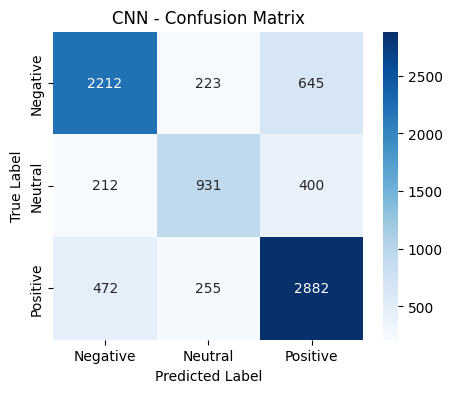


BiLSTM - Epoch 1/10


100%|██████████| 1029/1029 [00:10<00:00, 96.11it/s]


BiLSTM - Average training loss: 0.8795, Training Accuracy: 0.5934
BiLSTM - Validation Accuracy: 0.6679

BiLSTM - Epoch 2/10


100%|██████████| 1029/1029 [00:10<00:00, 96.86it/s]


BiLSTM - Average training loss: 0.7396, Training Accuracy: 0.6832
BiLSTM - Validation Accuracy: 0.6970

BiLSTM - Epoch 3/10


100%|██████████| 1029/1029 [00:10<00:00, 96.78it/s]


BiLSTM - Average training loss: 0.6662, Training Accuracy: 0.7232
BiLSTM - Validation Accuracy: 0.7479

BiLSTM - Epoch 4/10


100%|██████████| 1029/1029 [00:10<00:00, 96.53it/s]


BiLSTM - Average training loss: 0.6014, Training Accuracy: 0.7547
BiLSTM - Validation Accuracy: 0.7529

BiLSTM - Epoch 5/10


100%|██████████| 1029/1029 [00:10<00:00, 96.52it/s]


BiLSTM - Average training loss: 0.5562, Training Accuracy: 0.7801
BiLSTM - Validation Accuracy: 0.7759

BiLSTM - Epoch 6/10


100%|██████████| 1029/1029 [00:10<00:00, 96.80it/s]


BiLSTM - Average training loss: 0.5145, Training Accuracy: 0.8006
BiLSTM - Validation Accuracy: 0.7863

BiLSTM - Epoch 7/10


100%|██████████| 1029/1029 [00:10<00:00, 96.46it/s]


BiLSTM - Average training loss: 0.4803, Training Accuracy: 0.8176
BiLSTM - Validation Accuracy: 0.7907

BiLSTM - Epoch 8/10


100%|██████████| 1029/1029 [00:10<00:00, 96.17it/s]


BiLSTM - Average training loss: 0.4441, Training Accuracy: 0.8352
BiLSTM - Validation Accuracy: 0.7988

BiLSTM - Epoch 9/10


100%|██████████| 1029/1029 [00:10<00:00, 96.53it/s]


BiLSTM - Average training loss: 0.4115, Training Accuracy: 0.8473
BiLSTM - Validation Accuracy: 0.8038

BiLSTM - Epoch 10/10


100%|██████████| 1029/1029 [00:10<00:00, 95.94it/s]


BiLSTM - Average training loss: 0.3777, Training Accuracy: 0.8611
BiLSTM - Validation Accuracy: 0.7986

BiLSTM - Validation Classification Report:
              precision    recall  f1-score   support

    Negative       0.79      0.82      0.81      3080
     Neutral       0.78      0.66      0.72      1543
    Positive       0.81      0.84      0.82      3609

    accuracy                           0.80      8232
   macro avg       0.80      0.77      0.78      8232
weighted avg       0.80      0.80      0.80      8232


BiLSTM - Validation Confusion Matrix:
[[2530  122  428]
 [ 230 1023  290]
 [ 429  159 3021]]


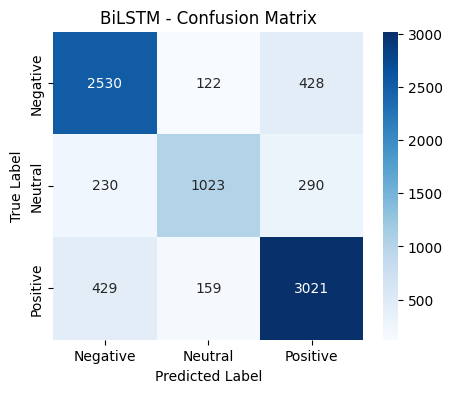

In [12]:
# Training parameters
epochs_rnn = 10

# Train and evaluate CNN
cnn_optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)
for epoch in range(epochs_rnn):
    print(f"\nCNN - Epoch {epoch + 1}/{epochs_rnn}")
    cnn_model.train()
    total_train_loss = 0
    train_correct = 0
    train_total = 0
    for batch in tqdm(text_train_loader):
        input_ids = batch['input_ids'].to(device)
        labels = batch['labels'].to(device)
        outputs = cnn_model(input_ids=input_ids, labels=labels)
        loss = outputs.loss
        total_train_loss += loss.item()
        preds = torch.argmax(outputs.logits, dim=1)
        train_correct += (preds == labels).sum().item()
        train_total += labels.size(0)
        cnn_optimizer.zero_grad()
        loss.backward()
        cnn_optimizer.step()
    print(f"CNN - Average training loss: {total_train_loss / len(text_train_loader):.4f}, "
          f"Training Accuracy: {train_correct / train_total:.4f}")

    cnn_model.eval()
    val_correct = 0
    val_total = 0
    cnn_val_preds = []
    cnn_val_labels = []
    with torch.no_grad():
        for batch in text_val_loader:
            input_ids = batch['input_ids'].to(device)
            labels = batch['labels'].to(device)
            outputs = cnn_model(input_ids=input_ids, labels=labels)
            preds = torch.argmax(outputs.logits, dim=1)
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)
            cnn_val_preds.extend(preds.cpu().numpy())
            cnn_val_labels.extend(labels.cpu().numpy())
    print(f"CNN - Validation Accuracy: {val_correct / val_total:.4f}")

print("\nCNN - Validation Classification Report:")
print(classification_report(cnn_val_labels, cnn_val_preds, target_names=['Negative', 'Neutral', 'Positive']))
print_confusion_matrix(cnn_val_labels, cnn_val_preds, "CNN")

# Train and evaluate BiLSTM
bilstm_optimizer = optim.Adam(bilstm_model.parameters(), lr=0.001)
for epoch in range(epochs_rnn):
    print(f"\nBiLSTM - Epoch {epoch + 1}/{epochs_rnn}")
    bilstm_model.train()
    total_train_loss = 0
    train_correct = 0
    train_total = 0
    for batch in tqdm(text_train_loader):
        input_ids = batch['input_ids'].to(device)
        labels = batch['labels'].to(device)
        outputs = bilstm_model(input_ids=input_ids, labels=labels)
        loss = outputs.loss
        total_train_loss += loss.item()
        preds = torch.argmax(outputs.logits, dim=1)
        train_correct += (preds == labels).sum().item()
        train_total += labels.size(0)
        bilstm_optimizer.zero_grad()
        loss.backward()
        bilstm_optimizer.step()
    print(f"BiLSTM - Average training loss: {total_train_loss / len(text_train_loader):.4f}, "
          f"Training Accuracy: {train_correct / train_total:.4f}")

    bilstm_model.eval()
    val_correct = 0
    val_total = 0
    bilstm_val_preds = []
    bilstm_val_labels = []
    with torch.no_grad():
        for batch in text_val_loader:
            input_ids = batch['input_ids'].to(device)
            labels = batch['labels'].to(device)
            outputs = bilstm_model(input_ids=input_ids, labels=labels)
            preds = torch.argmax(outputs.logits, dim=1)
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)
            bilstm_val_preds.extend(preds.cpu().numpy())
            bilstm_val_labels.extend(labels.cpu().numpy())
    print(f"BiLSTM - Validation Accuracy: {val_correct / val_total:.4f}")

print("\nBiLSTM - Validation Classification Report:")
print(classification_report(bilstm_val_labels, bilstm_val_preds, target_names=['Negative', 'Neutral', 'Positive']))
print_confusion_matrix(bilstm_val_labels, bilstm_val_preds, "BiLSTM")

training


Logistic Regression - Test Classification Report:
              precision    recall  f1-score   support

    Negative       0.81      0.74      0.77      1633
     Neutral       0.53      0.78      0.63       619
    Positive       0.83      0.75      0.79      1546

    accuracy                           0.75      3798
   macro avg       0.72      0.76      0.73      3798
weighted avg       0.77      0.75      0.76      3798


Logistic Regression - Confusion Matrix:
[[1212  241  180]
 [  84  482   53]
 [ 209  178 1159]]


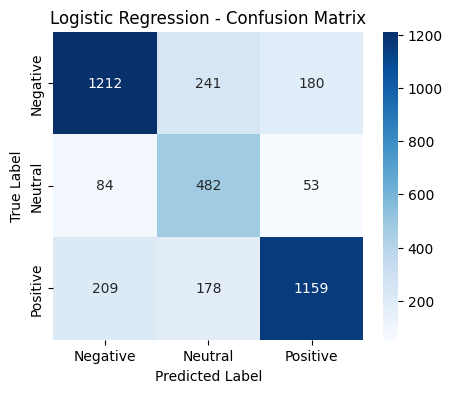


XGBoost - Test Classification Report:
              precision    recall  f1-score   support

    Negative       0.80      0.71      0.75      1633
     Neutral       0.60      0.72      0.66       619
    Positive       0.76      0.79      0.77      1546

    accuracy                           0.74      3798
   macro avg       0.72      0.74      0.73      3798
weighted avg       0.75      0.74      0.74      3798


XGBoost - Confusion Matrix:
[[1153  173  307]
 [  86  446   87]
 [ 202  123 1221]]


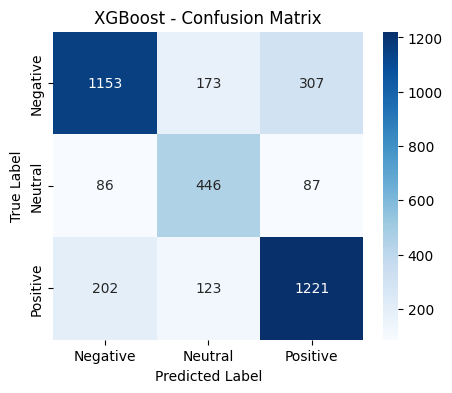


SVM - Test Classification Report:
              precision    recall  f1-score   support

    Negative       0.81      0.74      0.77      1633
     Neutral       0.56      0.81      0.66       619
    Positive       0.84      0.76      0.80      1546

    accuracy                           0.76      3798
   macro avg       0.73      0.77      0.74      3798
weighted avg       0.78      0.76      0.76      3798


SVM - Confusion Matrix:
[[1207  237  189]
 [  75  500   44]
 [ 209  156 1181]]


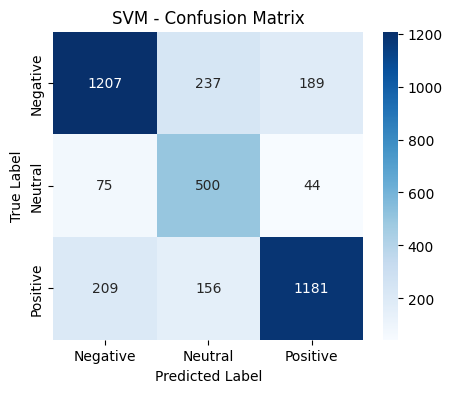


Random Forest - Test Classification Report:
              precision    recall  f1-score   support

    Negative       0.73      0.72      0.72      1633
     Neutral       0.57      0.61      0.59       619
    Positive       0.74      0.73      0.74      1546

    accuracy                           0.71      3798
   macro avg       0.68      0.69      0.68      3798
weighted avg       0.71      0.71      0.71      3798


Random Forest - Confusion Matrix:
[[1174  164  295]
 [ 145  377   97]
 [ 300  117 1129]]


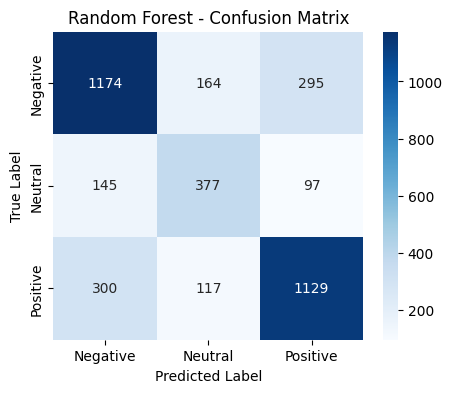


DistilBERT - Test Classification Report:
              precision    recall  f1-score   support

    Negative       0.90      0.94      0.92      1633
     Neutral       0.85      0.84      0.84       619
    Positive       0.92      0.89      0.90      1546

    accuracy                           0.90      3798
   macro avg       0.89      0.89      0.89      3798
weighted avg       0.90      0.90      0.90      3798


DistilBERT - Confusion Matrix:
[[1528   32   73]
 [  60  519   40]
 [ 117   60 1369]]


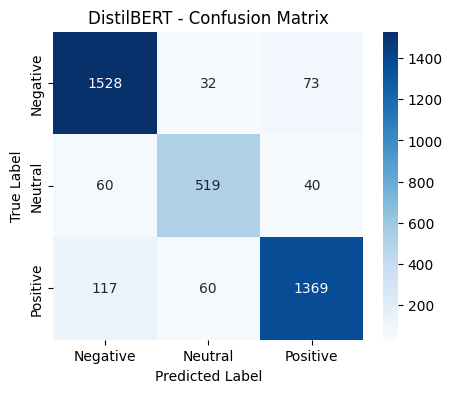


RoBERTa - Test Classification Report:
              precision    recall  f1-score   support

    Negative       0.92      0.92      0.92      1633
     Neutral       0.84      0.82      0.83       619
    Positive       0.91      0.92      0.92      1546

    accuracy                           0.90      3798
   macro avg       0.89      0.89      0.89      3798
weighted avg       0.90      0.90      0.90      3798


RoBERTa - Confusion Matrix:
[[1508   49   76]
 [  52  510   57]
 [  85   45 1416]]


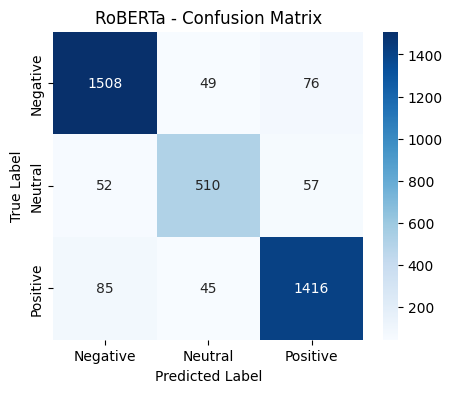


BERT - Test Classification Report:
              precision    recall  f1-score   support

    Negative       0.94      0.89      0.91      1633
     Neutral       0.85      0.84      0.84       619
    Positive       0.89      0.95      0.92      1546

    accuracy                           0.90      3798
   macro avg       0.89      0.89      0.89      3798
weighted avg       0.90      0.90      0.90      3798


BERT - Confusion Matrix:
[[1451   54  128]
 [  49  519   51]
 [  44   40 1462]]


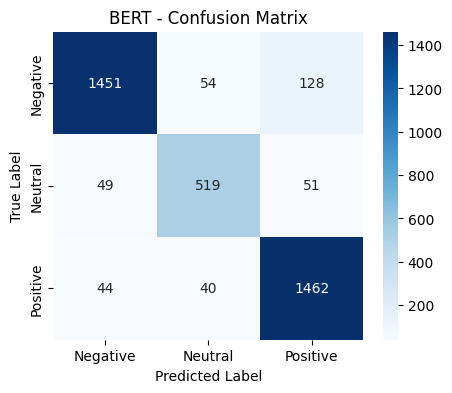


T5 - Test Classification Report:
              precision    recall  f1-score   support

    Negative       0.85      0.84      0.84      1633
     Neutral       0.82      0.74      0.78       619
    Positive       0.82      0.86      0.84      1546

    accuracy                           0.83      3798
   macro avg       0.83      0.81      0.82      3798
weighted avg       0.83      0.83      0.83      3798


T5 - Confusion Matrix:
[[1370   57  206]
 [  78  455   86]
 [ 172   43 1331]]


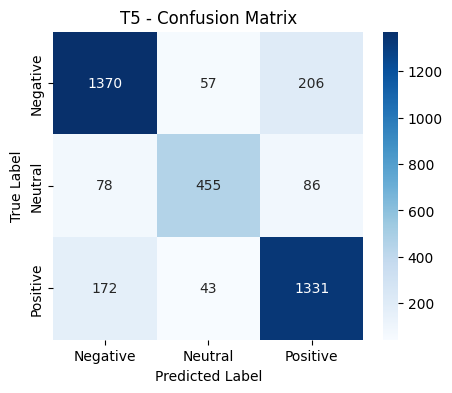


CNN - Test Classification Report:
              precision    recall  f1-score   support

    Negative       0.78      0.70      0.74      1633
     Neutral       0.62      0.61      0.62       619
    Positive       0.71      0.79      0.75      1546

    accuracy                           0.72      3798
   macro avg       0.71      0.70      0.70      3798
weighted avg       0.73      0.72      0.72      3798


CNN - Confusion Matrix:
[[1150  134  349]
 [  94  379  146]
 [ 228   96 1222]]


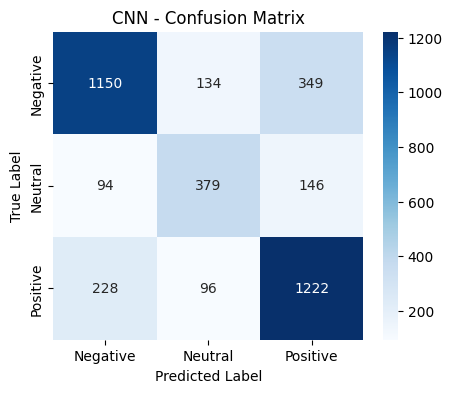


BiLSTM - Test Classification Report:
              precision    recall  f1-score   support

    Negative       0.80      0.80      0.80      1633
     Neutral       0.75      0.70      0.72       619
    Positive       0.79      0.81      0.80      1546

    accuracy                           0.79      3798
   macro avg       0.78      0.77      0.77      3798
weighted avg       0.79      0.79      0.79      3798


BiLSTM - Confusion Matrix:
[[1303   77  253]
 [ 101  432   86]
 [ 224   70 1252]]


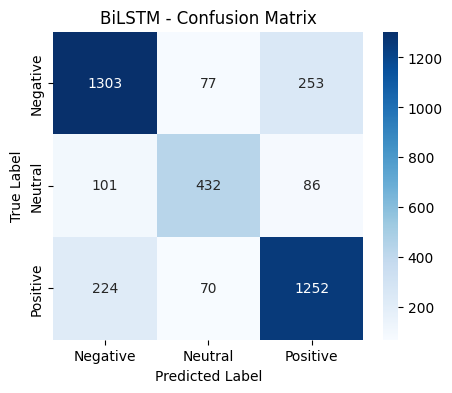

In [15]:
# Import required libraries
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import torch

# Modified function to print confusion matrix
def print_confusion_matrix(y_true, y_pred, model_name, set_name="Test"):
    cm = confusion_matrix(y_true, y_pred)
    print(f"\n{model_name} - Confusion Matrix:")
    print(cm)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], 
                yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()

# Test set evaluation
test_pred_logreg = log_reg.predict(X_test_tfidf)
print("\nLogistic Regression - Test Classification Report:")
print(classification_report(test_df["label"], test_pred_logreg, target_names=['Negative', 'Neutral', 'Positive']))
print_confusion_matrix(test_df["label"], test_pred_logreg, "Logistic Regression")

test_pred_xgb = xgb_model.predict(X_test_tfidf)
print("\nXGBoost - Test Classification Report:")
print(classification_report(test_df["label"], test_pred_xgb, target_names=['Negative', 'Neutral', 'Positive']))
print_confusion_matrix(test_df["label"], test_pred_xgb, "XGBoost")

test_pred_svm = svm_model.predict(X_test_tfidf)
print("\nSVM - Test Classification Report:")
print(classification_report(test_df["label"], test_pred_svm, target_names=['Negative', 'Neutral', 'Positive']))
print_confusion_matrix(test_df["label"], test_pred_svm, "SVM")

test_pred_rf = rf_model.predict(X_test_tfidf)
print("\nRandom Forest - Test Classification Report:")
print(classification_report(test_df["label"], test_pred_rf, target_names=['Negative', 'Neutral', 'Positive']))
print_confusion_matrix(test_df["label"], test_pred_rf, "Random Forest")

distilbert_model.eval()
distilbert_test_preds = []
distilbert_test_labels = []
with torch.no_grad():
    for batch in distilbert_test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = distilbert_model(input_ids=input_ids, attention_mask=attention_mask)
        preds = torch.argmax(outputs.logits, dim=1)
        distilbert_test_preds.extend(preds.cpu().numpy())
        distilbert_test_labels.extend(labels.cpu().numpy())

print("\nDistilBERT - Test Classification Report:")
print(classification_report(distilbert_test_labels, distilbert_test_preds, target_names=['Negative', 'Neutral', 'Positive']))
print_confusion_matrix(distilbert_test_labels, distilbert_test_preds, "DistilBERT")

roberta_model.eval()
roberta_test_preds = []
roberta_test_labels = []
with torch.no_grad():
    for batch in roberta_test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = roberta_model(input_ids=input_ids, attention_mask=attention_mask)
        preds = torch.argmax(outputs.logits, dim=1)
        roberta_test_preds.extend(preds.cpu().numpy())
        roberta_test_labels.extend(labels.cpu().numpy())

print("\nRoBERTa - Test Classification Report:")
print(classification_report(roberta_test_labels, roberta_test_preds, target_names=['Negative', 'Neutral', 'Positive']))
print_confusion_matrix(roberta_test_labels, roberta_test_preds, "RoBERTa")

bert_model.eval()
bert_test_preds = []
bert_test_labels = []
with torch.no_grad():
    for batch in bert_test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = bert_model(input_ids=input_ids, attention_mask=attention_mask)
        preds = torch.argmax(outputs.logits, dim=1)
        bert_test_preds.extend(preds.cpu().numpy())
        bert_test_labels.extend(labels.cpu().numpy())

print("\nBERT - Test Classification Report:")
print(classification_report(bert_test_labels, bert_test_preds, target_names=['Negative', 'Neutral', 'Positive']))
print_confusion_matrix(bert_test_labels, bert_test_preds, "BERT")

t5_classifier.eval()
t5_test_preds = []
t5_test_labels = []
with torch.no_grad():
    for batch in t5_test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = t5_classifier(input_ids=input_ids, attention_mask=attention_mask)
        preds = torch.argmax(outputs.logits, dim=1)
        t5_test_preds.extend(preds.cpu().numpy())
        t5_test_labels.extend(labels.cpu().numpy())

print("\nT5 - Test Classification Report:")
print(classification_report(t5_test_labels, t5_test_preds, target_names=['Negative', 'Neutral', 'Positive']))
print_confusion_matrix(t5_test_labels, t5_test_preds, "T5")

cnn_model.eval()
cnn_test_preds = []
cnn_test_labels = []
with torch.no_grad():
    for batch in text_test_loader:
        input_ids = batch['input_ids'].to(device)
        labels = batch['labels'].to(device)
        outputs = cnn_model(input_ids=input_ids)
        preds = torch.argmax(outputs.logits, dim=1)
        cnn_test_preds.extend(preds.cpu().numpy())
        cnn_test_labels.extend(labels.cpu().numpy())

print("\nCNN - Test Classification Report:")
print(classification_report(cnn_test_labels, cnn_test_preds, target_names=['Negative', 'Neutral', 'Positive']))
print_confusion_matrix(cnn_test_labels, cnn_test_preds, "CNN")

bilstm_model.eval()
bilstm_test_preds = []
bilstm_test_labels = []
with torch.no_grad():
    for batch in text_test_loader:
        input_ids = batch['input_ids'].to(device)
        labels = batch['labels'].to(device)
        outputs = bilstm_model(input_ids=input_ids)
        preds = torch.argmax(outputs.logits, dim=1)
        bilstm_test_preds.extend(preds.cpu().numpy())
        bilstm_test_labels.extend(labels.cpu().numpy())

print("\nBiLSTM - Test Classification Report:")
print(classification_report(bilstm_test_labels, bilstm_test_preds, target_names=['Negative', 'Neutral', 'Positive']))
print_confusion_matrix(bilstm_test_labels, bilstm_test_preds, "BiLSTM")

chnage

# Voting Ensemble 


Voting Ensemble - Validation Accuracy: 0.7810981535471332
Voting Ensemble - Validation Classification Report:
              precision    recall  f1-score   support

    Negative       0.78      0.82      0.80      3080
     Neutral       0.64      0.80      0.71      1543
    Positive       0.87      0.75      0.80      3609

    accuracy                           0.78      8232
   macro avg       0.76      0.79      0.77      8232
weighted avg       0.79      0.78      0.78      8232


Voting Ensemble - Validation Confusion Matrix:
[[2512  280  288]
 [ 208 1227  108]
 [ 496  422 2691]]


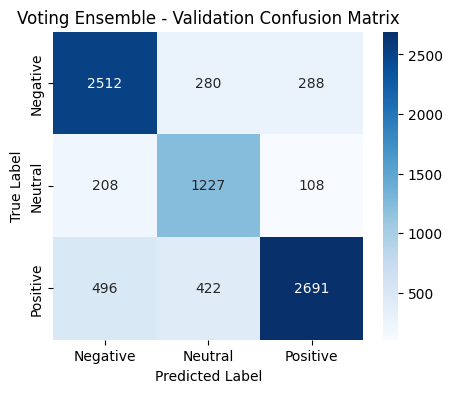


Voting Ensemble - Test Classification Report:
              precision    recall  f1-score   support

    Negative       0.78      0.80      0.79      1633
     Neutral       0.59      0.75      0.66       619
    Positive       0.84      0.73      0.79      1546

    accuracy                           0.76      3798
   macro avg       0.74      0.76      0.75      3798
weighted avg       0.78      0.76      0.77      3798


Voting Ensemble - Test Confusion Matrix:
[[1303  162  168]
 [ 111  467   41]
 [ 253  159 1134]]


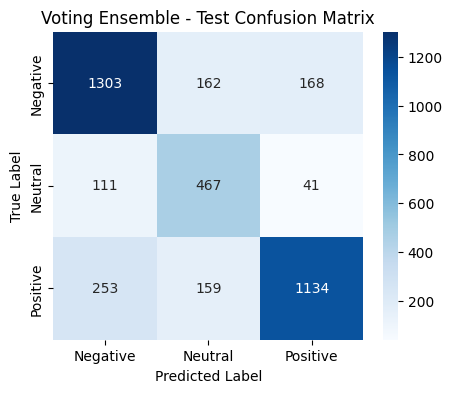

In [25]:
# Import required libraries
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Modified function to print confusion matrix
def print_confusion_matrix(y_true, y_pred, model_name, set_name="Validation"):
    cm = confusion_matrix(y_true, y_pred)
    print(f"\n{model_name} - {set_name} Confusion Matrix:")
    print(cm)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], 
                yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"{model_name} - {set_name} Confusion Matrix")
    plt.show()

# Voting Ensemble for ML Models
voting_ensemble = VotingClassifier(
    estimators=[
        ('logreg', log_reg),
        ('xgb', xgb_model),
        ('svm', svm_model),
        ('rf', rf_model)
    ],
    voting='hard'
)
voting_ensemble.fit(X_train_tfidf, y_train)
voting_preds = voting_ensemble.predict(X_val_tfidf)
print("\nVoting Ensemble - Validation Accuracy:", accuracy_score(y_val, voting_preds))
print("Voting Ensemble - Validation Classification Report:")
print(classification_report(y_val, voting_preds, target_names=['Negative', 'Neutral', 'Positive']))
print_confusion_matrix(y_val, voting_preds, "Voting Ensemble")

voting_test_preds = voting_ensemble.predict(X_test_tfidf)
print("\nVoting Ensemble - Test Classification Report:")
print(classification_report(test_df["label"], voting_test_preds, target_names=['Negative', 'Neutral', 'Positive']))
print_confusion_matrix(test_df["label"], voting_test_preds, "Voting Ensemble", set_name="Test")

# ensemble model


Transformer Ensemble - Validation Accuracy: 0.9342808551992225
Transformer Ensemble - Validation Classification Report:
              precision    recall  f1-score   support

    Negative       0.93      0.94      0.94      3080
     Neutral       0.92      0.88      0.90      1543
    Positive       0.94      0.95      0.95      3609

    accuracy                           0.93      8232
   macro avg       0.93      0.92      0.93      8232
weighted avg       0.93      0.93      0.93      8232


Transformer Ensemble - Validation Confusion Matrix:
[[2900   58  122]
 [ 102 1357   84]
 [ 113   62 3434]]


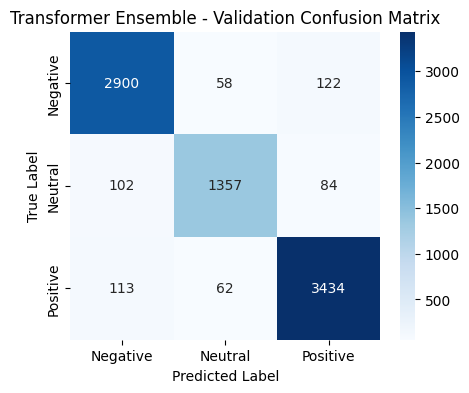


Transformer Ensemble - Test Classification Report:
              precision    recall  f1-score   support

    Negative       0.93      0.93      0.93      1633
     Neutral       0.88      0.86      0.87       619
    Positive       0.93      0.94      0.93      1546

    accuracy                           0.92      3798
   macro avg       0.91      0.91      0.91      3798
weighted avg       0.92      0.92      0.92      3798


Transformer Ensemble - Test Confusion Matrix:
[[1519   37   77]
 [  49  532   38]
 [  65   33 1448]]


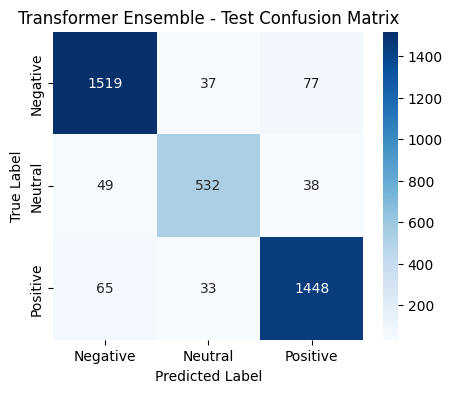

In [24]:
# Import required libraries
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch

# Modified function to print confusion matrix
def print_confusion_matrix(y_true, y_pred, model_name, set_name="Validation"):
    cm = confusion_matrix(y_true, y_pred)
    print(f"\n{model_name} - {set_name} Confusion Matrix:")
    print(cm)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], 
                yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"{model_name} - {set_name} Confusion Matrix")
    plt.show()

# Transformer Ensemble
def ensemble_transformer_predictions(models, loaders):
    all_logits = []
    for model, loader in zip(models, loaders):
        model.eval()
        logits = []
        with torch.no_grad():
            for batch in loader:
                input_ids = batch['input_ids'].to(device)
                attention_mask = batch['attention_mask'].to(device)
                outputs = model(input_ids=input_ids, attention_mask=attention_mask)
                logits.append(outputs.logits.cpu().numpy())
        all_logits.append(np.concatenate(logits))
    ensemble_logits = np.mean(all_logits, axis=0)
    ensemble_preds = np.argmax(ensemble_logits, axis=1)
    return ensemble_preds

transformer_models = [distilbert_model, roberta_model, bert_model]
transformer_loaders = [distilbert_val_loader, roberta_val_loader, bert_val_loader]
transformer_ensemble_preds = ensemble_transformer_predictions(transformer_models, transformer_loaders)
print("\nTransformer Ensemble - Validation Accuracy:", accuracy_score(y_val, transformer_ensemble_preds))
print("Transformer Ensemble - Validation Classification Report:")
print(classification_report(y_val, transformer_ensemble_preds, target_names=['Negative', 'Neutral', 'Positive']))
print_confusion_matrix(y_val, transformer_ensemble_preds, "Transformer Ensemble")

transformer_test_loaders = [distilbert_test_loader, roberta_test_loader, bert_test_loader]
transformer_ensemble_test_preds = ensemble_transformer_predictions(transformer_models, transformer_test_loaders)
print("\nTransformer Ensemble - Test Classification Report:")
print(classification_report(test_df["label"], transformer_ensemble_test_preds, target_names=['Negative', 'Neutral', 'Positive']))
print_confusion_matrix(test_df["label"], transformer_ensemble_test_preds, "Transformer Ensemble", set_name="Test")

In [40]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Model comparison without stacking
models = ['Logistic Regression', 'XGBoost', 'SVM', 'Random Forest', 'DistilBERT', 'RoBERTa', 'BERT', 'T5', 'CNN', 'BiLSTM', 'Voting', 'Transformer Ensemble']
val_accuracies = [
    accuracy_score(y_val, val_preds_logreg),
    accuracy_score(y_val, val_preds_xgb),
    accuracy_score(y_val, val_preds_svm),
    accuracy_score(y_val, val_preds_rf),
    accuracy_score(distilbert_val_labels, distilbert_val_preds),
    accuracy_score(roberta_val_labels, roberta_val_preds),
    accuracy_score(bert_val_labels, bert_val_preds),
    accuracy_score(t5_val_labels, t5_val_preds),
    accuracy_score(cnn_val_labels, cnn_val_preds),
    accuracy_score(bilstm_val_labels, bilstm_val_preds),
    accuracy_score(y_val, voting_preds),
    accuracy_score(y_val, transformer_ensemble_preds)
]

logreg_metrics = precision_recall_fscore_support(y_val, val_preds_logreg, average=None, labels=[0, 1, 2])
xgb_metrics = precision_recall_fscore_support(y_val, val_preds_xgb, average=None, labels=[0, 1, 2])
svm_metrics = precision_recall_fscore_support(y_val, val_preds_svm, average=None, labels=[0, 1, 2])
rf_metrics = precision_recall_fscore_support(y_val, val_preds_rf, average=None, labels=[0, 1, 2])
distilbert_metrics = precision_recall_fscore_support(distilbert_val_labels, distilbert_val_preds, average=None, labels=[0, 1, 2])
roberta_metrics = precision_recall_fscore_support(roberta_val_labels, roberta_val_preds, average=None, labels=[0, 1, 2])
bert_metrics = precision_recall_fscore_support(bert_val_labels, bert_val_preds, average=None, labels=[0, 1, 2])
t5_metrics = precision_recall_fscore_support(t5_val_labels, t5_val_preds, average=None, labels=[0, 1, 2])
cnn_metrics = precision_recall_fscore_support(cnn_val_labels, cnn_val_preds, average=None, labels=[0, 1, 2])
bilstm_metrics = precision_recall_fscore_support(bilstm_val_labels, bilstm_val_preds, average=None, labels=[0, 1, 2])
voting_metrics = precision_recall_fscore_support(y_val, voting_preds, average=None, labels=[0, 1, 2])
transformer_ensemble_metrics = precision_recall_fscore_support(y_val, transformer_ensemble_preds, average=None, labels=[0, 1, 2])

comparison_data = {
    'Model': models,
    'Val. Acc.': [round(acc, 4) for acc in val_accuracies],
    'Neg. Prec.': [logreg_metrics[0][0], xgb_metrics[0][0], svm_metrics[0][0], rf_metrics[0][0], 
                   distilbert_metrics[0][0], roberta_metrics[0][0], bert_metrics[0][0], t5_metrics[0][0], 
                   cnn_metrics[0][0], bilstm_metrics[0][0], voting_metrics[0][0], 
                   transformer_ensemble_metrics[0][0]],
    'Neg. Rec.': [logreg_metrics[1][0], xgb_metrics[1][0], svm_metrics[1][0], rf_metrics[1][0], 
                  distilbert_metrics[1][0], roberta_metrics[1][0], bert_metrics[1][0], t5_metrics[1][0], 
                  cnn_metrics[1][0], bilstm_metrics[1][0], voting_metrics[1][0], 
                  transformer_ensemble_metrics[1][0]],
    'Neg. F1': [logreg_metrics[2][0], xgb_metrics[2][0], svm_metrics[2][0], rf_metrics[2][0], 
                distilbert_metrics[2][0], roberta_metrics[2][0], bert_metrics[2][0], t5_metrics[2][0], 
                cnn_metrics[2][0], bilstm_metrics[2][0], voting_metrics[2][0], 
                transformer_ensemble_metrics[2][0]],
    'Neu. Prec.': [logreg_metrics[0][1], xgb_metrics[0][1], svm_metrics[0][1], rf_metrics[0][1], 
                   distilbert_metrics[0][1], roberta_metrics[0][1], bert_metrics[0][1], t5_metrics[0][1], 
                   cnn_metrics[0][1], bilstm_metrics[0][1], voting_metrics[0][1], 
                   transformer_ensemble_metrics[0][1]],
    'Neu. Rec.': [logreg_metrics[1][1], xgb_metrics[1][1], svm_metrics[1][1], rf_metrics[1][1], 
                  distilbert_metrics[1][1], roberta_metrics[1][1], bert_metrics[1][1], t5_metrics[1][1], 
                  cnn_metrics[1][1], bilstm_metrics[1][1], voting_metrics[1][1], 
                  transformer_ensemble_metrics[1][1]],
    'Neu. F1': [logreg_metrics[2][1], xgb_metrics[2][1], svm_metrics[2][1], rf_metrics[2][1], 
                distilbert_metrics[2][1], roberta_metrics[2][1], bert_metrics[2][1], t5_metrics[2][1], 
                cnn_metrics[2][1], bilstm_metrics[2][1], voting_metrics[2][1], 
                transformer_ensemble_metrics[2][1]],
    'Pos. Prec.': [logreg_metrics[0][2], xgb_metrics[0][2], svm_metrics[0][2], rf_metrics[0][2], 
                   distilbert_metrics[0][2], roberta_metrics[0][2], bert_metrics[0][2], t5_metrics[0][2], 
                   cnn_metrics[0][2], bilstm_metrics[0][2], voting_metrics[0][2], 
                   transformer_ensemble_metrics[0][2]],
    'Pos. Rec.': [logreg_metrics[1][2], xgb_metrics[1][2], svm_metrics[1][2], rf_metrics[1][2], 
                  distilbert_metrics[1][2], roberta_metrics[1][2], bert_metrics[1][2], t5_metrics[1][2], 
                  cnn_metrics[1][2], bilstm_metrics[1][2], voting_metrics[1][2], 
                  transformer_ensemble_metrics[1][2]],
    'Pos. F1': [logreg_metrics[2][2], xgb_metrics[2][2], svm_metrics[2][2], rf_metrics[2][2], 
                distilbert_metrics[2][2], roberta_metrics[2][2], bert_metrics[2][2], t5_metrics[2][2], 
                cnn_metrics[2][2], bilstm_metrics[2][2], voting_metrics[2][2], 
                transformer_ensemble_metrics[2][2]]
}

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.round(4)

# Function to add borders to the table
def style_table(df):
    return df.style.set_properties(**{
        'border': '1px solid black',
        'text-align': 'center',
        'padding': '5px'
    }).set_table_styles([
        {'selector': 'th', 'props': [('border', '1px solid black'), ('text-align', 'center'), ('padding', '5px')]}
    ])

# Display the table with borders
print("\nTable 1: Model Comparison on Validation Set")
styled_df = style_table(comparison_df)
9


Table 1: Model Comparison on Validation Set


,Model,Val. Acc.,Neg. Prec.,Neg. Rec.,Neg. F1,Neu. Prec.,Neu. Rec.,Neu. F1,Pos. Prec.,Pos. Rec.,Pos. F1
0,Logistic Regression,0.776400,0.815000,0.759700,0.786400,0.597100,0.819200,0.690700,0.859100,0.772200,0.813400
1,XGBoost,0.756800,0.788800,0.731200,0.758900,0.638200,0.740800,0.685700,0.790600,0.785500,0.788000
2,SVM,0.788500,0.816600,0.773400,0.794400,0.625500,0.834700,0.715200,0.866400,0.781700,0.821800
3,Random Forest,0.736900,0.737500,0.718800,0.728000,0.646400,0.688300,0.666700,0.777800,0.773100,0.775400
4,DistilBERT,0.912100,0.894800,0.938600,0.916200,0.876300,0.854200,0.865100,0.943400,0.914100,0.928500
5,RoBERTa,0.919000,0.919600,0.927900,0.923700,0.872200,0.862600,0.867400,0.938300,0.935400,0.936900
6,BERT,0.920100,0.938700,0.909400,0.923800,0.892400,0.865200,0.878600,0.916300,0.952600,0.934100
7,T5,0.848200,0.833100,0.868500,0.850400,0.863900,0.732300,0.792700,0.855600,0.880300,0.867800
8,CNN,0.731900,0.763800,0.718200,0.740300,0.660800,0.603400,0.630800,0.733900,0.798600,0.764900
9,BiLSTM,0.798600,0.793400,0.821400,0.807100,0.784500,0.663000,0.718700,0.808000,0.837100,0.822300


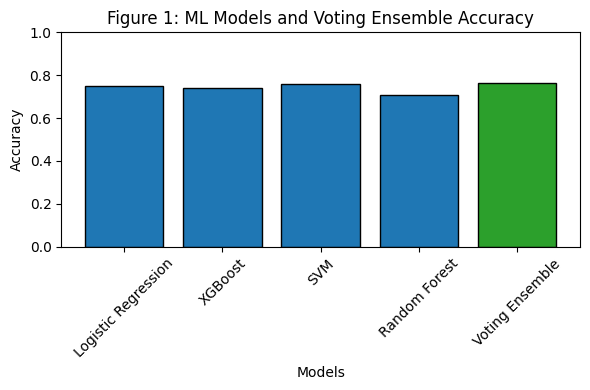

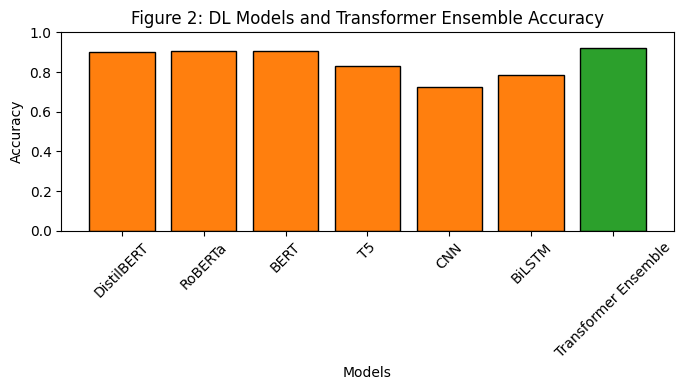

In [30]:
import pandas as pd 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Test accuracies without stacking
test_accuracies = {
    'Logistic Regression': accuracy_score(test_df["label"], test_pred_logreg),
    'XGBoost': accuracy_score(test_df["label"], test_pred_xgb),
    'SVM': accuracy_score(test_df["label"], test_pred_svm),
    'Random Forest': accuracy_score(test_df["label"], test_pred_rf),
    'DistilBERT': accuracy_score(distilbert_test_labels, distilbert_test_preds),
    'RoBERTa': accuracy_score(roberta_test_labels, roberta_test_preds),
    'BERT': accuracy_score(bert_test_labels, bert_test_preds),
    'T5': accuracy_score(t5_test_labels, t5_test_preds),
    'CNN': accuracy_score(cnn_test_labels, cnn_test_preds),
    'BiLSTM': accuracy_score(bilstm_test_labels, bilstm_test_preds),
    'Voting Ensemble': accuracy_score(test_df["label"], voting_test_preds),
    'Transformer Ensemble': accuracy_score(test_df["label"], transformer_ensemble_test_preds)
}

# Define model categories
ml_models = ['Logistic Regression', 'XGBoost', 'SVM', 'Random Forest']
dl_models = ['DistilBERT', 'RoBERTa', 'BERT', 'T5', 'CNN', 'BiLSTM']
ensemble_ml = ['Voting Ensemble']
ensemble_dl = ['Transformer Ensemble']

# Plot 1: ML + Voting Ensemble
labels_ml_ens = ml_models + ensemble_ml
accuracies_ml_ens = [test_accuracies[model] for model in labels_ml_ens]
colors_ml_ens = ['#1f77b4'] * len(ml_models) + ['#2ca02c']

plt.figure(figsize=(6, 4))
plt.bar(labels_ml_ens, accuracies_ml_ens, color=colors_ml_ens, edgecolor='black')
plt.title("Figure 1: ML Models and Voting Ensemble Accuracy")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 2: DL + Transformer Ensemble
labels_dl_ens = dl_models + ensemble_dl
accuracies_dl_ens = [test_accuracies[model] for model in labels_dl_ens]
colors_dl_ens = ['#ff7f0e'] * len(dl_models) + ['#2ca02c']

plt.figure(figsize=(7, 4))
plt.bar(labels_dl_ens, accuracies_dl_ens, color=colors_dl_ens, edgecolor='black')
plt.title("Figure 2: DL Models and Transformer Ensemble Accuracy")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [38]:
import torch
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from transformers import DistilBertTokenizerFast, RobertaTokenizerFast, BertTokenizerFast, T5TokenizerFast

# Reverse mapping for sentiment labels
reverse_sentiment_mapping = {0: "Negative", 1: "Neutral", 2: "Positive"}

# Select one sample for each sentiment from the test dataset
def select_samples_by_sentiment(df):
    negative_sample = df[df["label"] == 0].iloc[0]  # Negative
    neutral_sample = df[df["label"] == 1].iloc[0]   # Neutral
    positive_sample = df[df["label"] == 2].iloc[0]  # Positive
    return [
        (negative_sample["clean_text"], negative_sample["label"], "Negative"),
        (neutral_sample["clean_text"], neutral_sample["label"], "Neutral"),
        (positive_sample["clean_text"], positive_sample["label"], "Positive")
    ]

# Get samples
samples = select_samples_by_sentiment(test_df)

# Helper function for transformer model prediction
def predict_transformer(model, tokenizer, text, device, max_len=128):
    model.eval()
    encoding = tokenizer(text, truncation=True, padding=True, max_length=max_len, return_tensors='pt')
    input_ids = encoding['input_ids'].to(device)
    attention_mask = encoding['attention_mask'].to(device)
    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        pred = torch.argmax(outputs.logits, dim=1).cpu().numpy()[0]
    return pred

# Helper function for CNN/BiLSTM prediction
def predict_text_model(model, text, vocab, max_len, device):
    model.eval()
    text = text.split()
    token_ids = [vocab.get(word, 0) for word in text[:max_len]]
    if len(token_ids) < max_len:
        token_ids += [0] * (max_len - len(token_ids))
    input_ids = torch.tensor([token_ids], dtype=torch.long).to(device)
    with torch.no_grad():
        outputs = model(input_ids=input_ids)
        pred = torch.argmax(outputs.logits, dim=1).cpu().numpy()[0]
    return pred

# Helper function for Transformer Ensemble prediction
def predict_transformer_ensemble(models, tokenizers, text, device, max_len=128):
    all_logits = []
    for model, tokenizer in zip(models, tokenizers):
        model.eval()
        encoding = tokenizer(text, truncation=True, padding=True, max_length=max_len, return_tensors='pt')
        input_ids = encoding['input_ids'].to(device)
        attention_mask = encoding['attention_mask'].to(device)
        with torch.no_grad():
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            all_logits.append(outputs.logits.cpu().numpy())
    ensemble_logits = np.mean(all_logits, axis=0)
    ensemble_pred = np.argmax(ensemble_logits, axis=1)[0]
    return ensemble_pred

# Models and their prediction functions
models = [
    ("Logistic Regression", lambda x: log_reg.predict(tfidf_vectorizer.transform([x]))[0]),
    ("XGBoost", lambda x: xgb_model.predict(tfidf_vectorizer.transform([x]))[0]),
    ("SVM", lambda x: svm_model.predict(tfidf_vectorizer.transform([x]))[0]),
    ("Random Forest", lambda x: rf_model.predict(tfidf_vectorizer.transform([x]))[0]),
    ("Voting Ensemble", lambda x: voting_ensemble.predict(tfidf_vectorizer.transform([x]))[0]),
    ("DistilBERT", lambda x: predict_transformer(distilbert_model, distilbert_tokenizer, x, device)),
    ("RoBERTa", lambda x: predict_transformer(roberta_model, roberta_tokenizer, x, device)),
    ("BERT", lambda x: predict_transformer(bert_model, bert_tokenizer, x, device)),
    ("T5", lambda x: predict_transformer(t5_classifier, t5_tokenizer, x, device)),
    ("CNN", lambda x: predict_text_model(cnn_model, x, vocab, MAX_LEN, device)),
    ("BiLSTM", lambda x: predict_text_model(bilstm_model, x, vocab, MAX_LEN, device)),
    ("Transformer Ensemble", lambda x: predict_transformer_ensemble(transformer_models, transformer_tokenizers, x, device))
]

# Create table data
table_data = {
    "Sample": [],
    "Text": [],
    "True Sentiment": []
}
for model_name, _ in models:
    table_data[model_name] = []

# Populate table with predictions
for sample_text, true_label, sentiment_name in samples:
    table_data["Sample"].append(sentiment_name)
    table_data["Text"].append(sample_text[:50] + "..." if len(sample_text) > 50 else sample_text)  # Truncate for display
    table_data["True Sentiment"].append(reverse_sentiment_mapping[true_label])
    for model_name, predict_fn in models:
        pred = predict_fn(sample_text)
        table_data[model_name].append(reverse_sentiment_mapping[pred])

# Create DataFrame
df = pd.DataFrame(table_data)

# Function to add borders to the table
def style_table(df):
    return df.style.set_properties(**{
        'border': '1px solid black',
        'text-align': 'center',
        'padding': '5px'
    }).set_table_styles([
        {'selector': 'th', 'props': [('border', '1px solid black'), ('text-align', 'center'), ('padding', '5px')]}
    ])

# Display the table with borders
print("\nTable: Sentiment Predictions for Negative, Neutral, and Positive Samples")
styled_df = style_table(df)
styled_df


Table: Sentiment Predictions for Negative, Neutral, and Positive Samples


,Sample,Text,True Sentiment,Logistic Regression,XGBoost,SVM,Random Forest,Voting Ensemble,DistilBERT,RoBERTa,BERT,T5,CNN,BiLSTM,Transformer Ensemble
0,Negative,trending new yorkers encounter empty supermarket s...,Negative,Neutral,Positive,Neutral,Negative,Neutral,Negative,Negative,Negative,Negative,Negative,Negative,Negative
1,Neutral,one week everyone buying baby milk powder the next...,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral
2,Positive,when i couldnt find hand sanitizer at fred meyer i...,Positive,Positive,Positive,Positive,Positive,Positive,Positive,Positive,Positive,Positive,Positive,Positive,Positive


# customized

In [39]:
import torch
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from transformers import DistilBertTokenizerFast, RobertaTokenizerFast, BertTokenizerFast, T5TokenizerFast
import re

# Reverse mapping for sentiment labels
reverse_sentiment_mapping = {0: "Negative", 1: "Neutral", 2: "Positive"}

# Custom COVID-related inputs
custom_samples = [
    ("The lockdown is suffocating, I miss normal life but I get why it’s needed.", 0, "Negative"),
    ("Masks are mandatory now, just part of the daily routine.", 1, "Neutral"),
    ("Grateful for the vaccine rollout, it’s a step toward freedom!", 2, "Positive")
]

# Clean text function (same as in original code)
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)  # Remove URLs
    text = re.sub(r"@\w+", "", text)  # Remove mentions
    text = re.sub(r"#\w+", "", text)  # Remove hashtags
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)  # Remove special characters
    text = re.sub(r"\s+", " ", text).strip()  # Normalize spaces
    return text

# Clean the custom inputs
cleaned_samples = [(clean_text(text), label, sentiment_name) for text, label, sentiment_name in custom_samples]

# Helper function for transformer model prediction
def predict_transformer(model, tokenizer, text, device, max_len=128):
    model.eval()
    encoding = tokenizer(text, truncation=True, padding=True, max_length=max_len, return_tensors='pt')
    input_ids = encoding['input_ids'].to(device)
    attention_mask = encoding['attention_mask'].to(device)
    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        pred = torch.argmax(outputs.logits, dim=1).cpu().numpy()[0]
    return pred

# Helper function for CNN/BiLSTM prediction
def predict_text_model(model, text, vocab, max_len, device):
    model.eval()
    text = text.split()
    token_ids = [vocab.get(word, 0) for word in text[:max_len]]
    if len(token_ids) < max_len:
        token_ids += [0] * (max_len - len(token_ids))
    input_ids = torch.tensor([token_ids], dtype=torch.long).to(device)
    with torch.no_grad():
        outputs = model(input_ids=input_ids)
        pred = torch.argmax(outputs.logits, dim=1).cpu().numpy()[0]
    return pred

# Helper function for Transformer Ensemble prediction
def predict_transformer_ensemble(models, tokenizers, text, device, max_len=128):
    all_logits = []
    for model, tokenizer in zip(models, tokenizers):
        model.eval()
        encoding = tokenizer(text, truncation=True, padding=True, max_length=max_len, return_tensors='pt')
        input_ids = encoding['input_ids'].to(device)
        attention_mask = encoding['attention_mask'].to(device)
        with torch.no_grad():
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            all_logits.append(outputs.logits.cpu().numpy())
    ensemble_logits = np.mean(all_logits, axis=0)
    ensemble_pred = np.argmax(ensemble_logits, axis=1)[0]
    return ensemble_pred

# Models and their prediction functions
models = [
    ("Logistic Regression", lambda x: log_reg.predict(tfidf_vectorizer.transform([x]))[0]),
    ("XGBoost", lambda x: xgb_model.predict(tfidf_vectorizer.transform([x]))[0]),
    ("SVM", lambda x: svm_model.predict(tfidf_vectorizer.transform([x]))[0]),
    ("Random Forest", lambda x: rf_model.predict(tfidf_vectorizer.transform([x]))[0]),
    ("Voting Ensemble", lambda x: voting_ensemble.predict(tfidf_vectorizer.transform([x]))[0]),
    ("DistilBERT", lambda x: predict_transformer(distilbert_model, distilbert_tokenizer, x, device)),
    ("RoBERTa", lambda x: predict_transformer(roberta_model, roberta_tokenizer, x, device)),
    ("BERT", lambda x: predict_transformer(bert_model, bert_tokenizer, x, device)),
    ("T5", lambda x: predict_transformer(t5_classifier, t5_tokenizer, x, device)),
    ("CNN", lambda x: predict_text_model(cnn_model, x, vocab, MAX_LEN, device)),
    ("BiLSTM", lambda x: predict_text_model(bilstm_model, x, vocab, MAX_LEN, device)),
    ("Transformer Ensemble", lambda x: predict_transformer_ensemble(transformer_models, transformer_tokenizers, x, device))
]

# Create table data
table_data = {
    "Sample": [],
    "Text": [],
    "True Sentiment": []
}
for model_name, _ in models:
    table_data[model_name] = []

# Populate table with predictions
for sample_text, true_label, sentiment_name in cleaned_samples:
    table_data["Sample"].append(sentiment_name)
    table_data["Text"].append(sample_text[:50] + "..." if len(sample_text) > 50 else sample_text)  # Truncate for display
    table_data["True Sentiment"].append(reverse_sentiment_mapping[true_label])
    for model_name, predict_fn in models:
        pred = predict_fn(sample_text)
        table_data[model_name].append(reverse_sentiment_mapping[pred])

# Create DataFrame
df = pd.DataFrame(table_data)

# Function to add borders to the table
def style_table(df):
    return df.style.set_properties(**{
        'border': '1px solid black',
        'text-align': 'center',
        'padding': '5px'
    }).set_table_styles([
        {'selector': 'th', 'props': [('border', '1px solid black'), ('text-align', 'center'), ('padding', '5px')]}
    ])

# Display the table with borders
print("\nTable: Sentiment Predictions for Custom COVID-Related Negative, Neutral, and Positive Samples")
styled_df = style_table(df)
styled_df


Table: Sentiment Predictions for Custom COVID-Related Negative, Neutral, and Positive Samples


,Sample,Text,True Sentiment,Logistic Regression,XGBoost,SVM,Random Forest,Voting Ensemble,DistilBERT,RoBERTa,BERT,T5,CNN,BiLSTM,Transformer Ensemble
0,Negative,the lockdown is suffocating i miss normal life but...,Negative,Positive,Neutral,Neutral,Neutral,Neutral,Negative,Negative,Negative,Negative,Neutral,Positive,Negative
1,Neutral,masks are mandatory now just part of the daily rou...,Neutral,Positive,Neutral,Neutral,Neutral,Neutral,Positive,Positive,Positive,Neutral,Neutral,Neutral,Positive
2,Positive,grateful for the vaccine rollout its a step toward...,Positive,Positive,Positive,Positive,Positive,Positive,Positive,Positive,Positive,Positive,Positive,Positive,Positive


In [31]:
''''
# Cross-Validation for ML Models
k = 5
kfold = KFold(n_splits=k, shuffle=True, random_state=42)

ml_models = {
    'Logistic Regression': log_reg,
    'XGBoost': xgb_model,
    'SVM': svm_model,
    'Random Forest': rf_model
}

cv_results = {}
for name, model in ml_models.items():
    cv_scores = cross_val_score(model, X_train_tfidf, y_train, cv=kfold, scoring='accuracy')
    cv_results[name] = {
        'Mean Accuracy': cv_scores.mean(),
        'Std Accuracy': cv_scores.std()
    }
    print(f"\n{name} - {k}-Fold CV Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Cross-Validation for DL Models
def train_eval_dl_model(model, train_loader, val_loader, optimizer, epochs, device, is_transformer=True):
    model.train()
    for epoch in range(epochs):
        total_train_loss = 0
        train_correct = 0
        train_total = 0
        for batch in train_loader:
            input_ids = batch['input_ids'].to(device)
            labels = batch['labels'].to(device)
            attention_mask = batch.get('attention_mask', None)
            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels) if is_transformer else model(input_ids=input_ids, labels=labels)
            loss = outputs.loss
            total_train_loss += loss.item()
            preds = torch.argmax(outputs.logits, dim=1)
            train_correct += (preds == labels).sum().item()
            train_total += labels.size(0)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    
    model.eval()
    val_correct = 0
    val_total = 0
    val_preds = []
    val_labels = []
    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch['input_ids'].to(device)
            labels = batch['labels'].to(device)
            attention_mask = batch.get('attention_mask', None)
            outputs = model(input_ids=input_ids, attention_mask=attention_mask) if is_transformer else model(input_ids=input_ids)
            preds = torch.argmax(outputs.logits, dim=1)
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)
            val_preds.extend(preds.cpu().numpy())
            val_labels.extend(labels.cpu().numpy())
    return accuracy_score(val_labels, val_preds)

dl_models = [
    ('DistilBERT', distilbert_model, distilbert_tokenizer, AdamW(distilbert_model.parameters(), lr=2e-5, weight_decay=0.03), True),
    ('RoBERTa', roberta_model, roberta_tokenizer, AdamW(roberta_model.parameters(), lr=2e-5, weight_decay=0.03), True),
    ('BERT', bert_model, bert_tokenizer, AdamW(bert_model.parameters(), lr=2e-5, weight_decay=0.03), True),
    ('T5', t5_classifier, t5_tokenizer, AdamW(t5_classifier.parameters(), lr=2e-5, weight_decay=0.03), True),
    ('CNN', cnn_model, None, optim.Adam(cnn_model.parameters(), lr=0.001), False),
    ('BiLSTM', bilstm_model, None, optim.Adam(bilstm_model.parameters(), lr=0.001), False)
]

cv_dl_results = {}
for name, model, tokenizer, optimizer, is_transformer in dl_models:
    cv_scores = []
    for fold, (train_idx, val_idx) in enumerate(kfold.split(X_train, y_train)):
        print(f"\n{name} - Fold {fold + 1}/{k}")
        train_texts, val_texts = X_train.iloc[train_idx].tolist(), X_train.iloc[val_idx].tolist()
        train_labels, val_labels = y_train.iloc[train_idx].tolist(), y_train.iloc[val_idx].tolist()
        
        if is_transformer:
            train_dataset = TweetDataset(train_texts, train_labels, tokenizer, MAX_LEN)
            val_dataset = TweetDataset(val_texts, val_labels, tokenizer, MAX_LEN)
        else:
            train_dataset = TextDataset(train_texts, train_labels, vocab, MAX_LEN)
            val_dataset = TextDataset(val_texts, val_labels, vocab, MAX_LEN)
        
        train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=32)
        
        # Reset model parameters
        if is_transformer:
            model = type(model).from_pretrained(model.config._name_or_path, num_labels=3).to(device)
            optimizer = AdamW(model.parameters(), lr=2e-5, weight_decay=0.03)
        else:
            model = type(model)(*model.__init__.__code__.co_varnames[1:], **model.__dict__).to(device)
            optimizer = optim.Adam(model.parameters(), lr=0.001)
        
        val_acc = train_eval_dl_model(model, train_loader, val_loader, optimizer, epochs=3, device=device, is_transformer=is_transformer)
        cv_scores.append(val_acc)
        print(f"{name} - Fold {fold + 1} Validation Accuracy: {val_acc:.4f}")
    
    cv_results[name] = {
        'Mean Accuracy': np.mean(cv_scores),
        'Std Accuracy': np.std(cv_scores)
    }
    print(f"\n{name} - {k}-Fold CV Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")



Logistic Regression - 5-Fold CV Accuracy: 0.7610 ± 0.0043


KeyboardInterrupt: 